Based off the Tensorflow 2 tutorial [basic_classification](https://www.tensorflow.org/alpha/tutorials/keras/basic_classification)

Import Tensorflow 2 and and tf.keras as well as some helper libraries

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print('Tensorflow version: {}'.format(tf.__version__))
print('Keras version: {}'.format(keras.__version__))

Tensorflow version: 2.0.0-alpha0
Keras version: 2.2.4-tf


Import the Fashion MNIST dataset, which contains around 70000 greyscale images in 10 different types of clothing in low resolution 28x28 pixel images. We'll download (this can be done directly using tensorflow as the MNIST data is often used as the hello world example for computer vision) split our data into 60000 training images and 10000 testing images. 

We load the data into four data sets train_images, train_labels, test_images, and test_labels. We have 10 labels (clothing types), one of which we are trying to predict for a given image.

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 2us/step


    8192/26421880 [..............................] - ETA: 2s

   24576/26421880 [..............................] - ETA: 1:13

   57344/26421880 [..............................] - ETA: 57s 

   98304/26421880 [..............................] - ETA: 48s

  147456/26421880 [..............................] - ETA: 41s

  229376/26421880 [..............................] - ETA: 33s

  294912/26421880 [..............................] - ETA: 31s

  360448/26421880 [..............................] - ETA: 29s

  442368/26421880 [..............................] - ETA: 27s

  499712/26421880 [..............................] - ETA: 31s

  532480/26421880 [..............................] - ETA: 36s

  688128/26421880 [..............................] - ETA: 33s

  811008/26421880 [..............................] - ETA: 30s

  851968/26421880 [..............................] - ETA: 33s

  966656/26421880 [>.............................] - ETA: 31s

 1048576/26421880 [>.............................] - ETA: 32s

 1146880/26421880 [>.............................] - ETA: 32s

 1212416/26421880 [>.............................] - ETA: 31s

 1228800/26421880 [>.............................] - ETA: 34s

 1359872/26421880 [>.............................] - ETA: 32s

 1409024/26421880 [>.............................] - ETA: 32s

 1458176/26421880 [>.............................] - ETA: 33s

 1523712/26421880 [>.............................] - ETA: 34s

 1605632/26421880 [>.............................] - ETA: 35s

 1654784/26421880 [>.............................] - ETA: 36s

 1720320/26421880 [>.............................] - ETA: 37s

 1736704/26421880 [>.............................] - ETA: 38s

 1818624/26421880 [=>............................] - ETA: 39s

 1884160/26421880 [=>............................] - ETA: 39s

 1900544/26421880 [=>............................] - ETA: 41s

 1966080/26421880 [=>............................] - ETA: 41s

 2048000/26421880 [=>............................] - ETA: 41s

 2113536/26421880 [=>............................] - ETA: 42s

 2146304/26421880 [=>............................] - ETA: 43s

 2195456/26421880 [=>............................] - ETA: 43s

 2228224/26421880 [=>............................] - ETA: 44s

 2277376/26421880 [=>............................] - ETA: 43s

 2310144/26421880 [=>............................] - ETA: 44s

 2342912/26421880 [=>............................] - ETA: 44s

 2375680/26421880 [=>............................] - ETA: 44s

 2408448/26421880 [=>............................] - ETA: 44s

 2441216/26421880 [=>............................] - ETA: 44s

 2473984/26421880 [=>............................] - ETA: 44s

 2506752/26421880 [=>............................] - ETA: 44s

 2555904/26421880 [=>............................] - ETA: 43s

 2605056/26421880 [=>............................] - ETA: 43s

 2654208/26421880 [==>...........................] - ETA: 43s

 2719744/26421880 [==>...........................] - ETA: 43s

 2752512/26421880 [==>...........................] - ETA: 42s

 2801664/26421880 [==>...........................] - ETA: 42s

 2850816/26421880 [==>...........................] - ETA: 42s

 2883584/26421880 [==>...........................] - ETA: 42s

 2932736/26421880 [==>...........................] - ETA: 41s

 2965504/26421880 [==>...........................] - ETA: 42s

 3031040/26421880 [==>...........................] - ETA: 42s

 3063808/26421880 [==>...........................] - ETA: 42s

 3129344/26421880 [==>...........................] - ETA: 41s

 3178496/26421880 [==>...........................] - ETA: 41s

 3219456/26421880 [==>...........................] - ETA: 41s

 3252224/26421880 [==>...........................] - ETA: 41s

 3276800/26421880 [==>...........................] - ETA: 41s

 3325952/26421880 [==>...........................] - ETA: 41s

 3375104/26421880 [==>...........................] - ETA: 40s

 3399680/26421880 [==>...........................] - ETA: 41s

 3465216/26421880 [==>...........................] - ETA: 40s

 3489792/26421880 [==>...........................] - ETA: 40s

 3522560/26421880 [==>...........................] - ETA: 40s

 3563520/26421880 [===>..........................] - ETA: 40s

 3629056/26421880 [===>..........................] - ETA: 40s

 3661824/26421880 [===>..........................] - ETA: 40s

 3686400/26421880 [===>..........................] - ETA: 40s

 3702784/26421880 [===>..........................] - ETA: 40s

 3735552/26421880 [===>..........................] - ETA: 40s

 3743744/26421880 [===>..........................] - ETA: 40s

 3760128/26421880 [===>..........................] - ETA: 41s

 3825664/26421880 [===>..........................] - ETA: 40s

 3866624/26421880 [===>..........................] - ETA: 40s

 3907584/26421880 [===>..........................] - ETA: 40s

 3915776/26421880 [===>..........................] - ETA: 40s

 3973120/26421880 [===>..........................] - ETA: 40s

 4022272/26421880 [===>..........................] - ETA: 40s

 4063232/26421880 [===>..........................] - ETA: 40s

 4087808/26421880 [===>..........................] - ETA: 40s

 4128768/26421880 [===>..........................] - ETA: 40s

 4161536/26421880 [===>..........................] - ETA: 40s

 4177920/26421880 [===>..........................] - ETA: 40s

 4251648/26421880 [===>..........................] - ETA: 39s

 4284416/26421880 [===>..........................] - ETA: 39s

 4341760/26421880 [===>..........................] - ETA: 39s

 4390912/26421880 [===>..........................] - ETA: 39s

 4440064/26421880 [====>.........................] - ETA: 38s

 4472832/26421880 [====>.........................] - ETA: 38s

 4538368/26421880 [====>.........................] - ETA: 38s

 4579328/26421880 [====>.........................] - ETA: 38s

 4636672/26421880 [====>.........................] - ETA: 37s

 4694016/26421880 [====>.........................] - ETA: 37s

 4734976/26421880 [====>.........................] - ETA: 37s

 4775936/26421880 [====>.........................] - ETA: 37s

 4825088/26421880 [====>.........................] - ETA: 37s

 4874240/26421880 [====>.........................] - ETA: 36s

 4939776/26421880 [====>.........................] - ETA: 36s

 4980736/26421880 [====>.........................] - ETA: 36s

 5005312/26421880 [====>.........................] - ETA: 36s

 5046272/26421880 [====>.........................] - ETA: 36s

 5062656/26421880 [====>.........................] - ETA: 37s

 5144576/26421880 [====>.........................] - ETA: 36s

 5210112/26421880 [====>.........................] - ETA: 36s

 5275648/26421880 [====>.........................] - ETA: 36s

 5349376/26421880 [=====>........................] - ETA: 35s

 5398528/26421880 [=====>........................] - ETA: 35s

 5480448/26421880 [=====>........................] - ETA: 35s

 5529600/26421880 [=====>........................] - ETA: 34s

 5578752/26421880 [=====>........................] - ETA: 34s

 5668864/26421880 [=====>........................] - ETA: 34s

 5726208/26421880 [=====>........................] - ETA: 34s

 5750784/26421880 [=====>........................] - ETA: 34s

 5849088/26421880 [=====>........................] - ETA: 33s

 5914624/26421880 [=====>........................] - ETA: 33s

 5980160/26421880 [=====>........................] - ETA: 33s

 6029312/26421880 [=====>........................] - ETA: 33s

 6078464/26421880 [=====>........................] - ETA: 33s

 6144000/26421880 [=====>........................] - ETA: 32s

 6225920/26421880 [======>.......................] - ETA: 32s

 6291456/26421880 [======>.......................] - ETA: 32s

 6324224/26421880 [======>.......................] - ETA: 32s

 6356992/26421880 [======>.......................] - ETA: 32s

 6373376/26421880 [======>.......................] - ETA: 32s

 6389760/26421880 [======>.......................] - ETA: 32s

 6406144/26421880 [======>.......................] - ETA: 33s

 6422528/26421880 [======>.......................] - ETA: 33s

 6537216/26421880 [======>.......................] - ETA: 33s

 6602752/26421880 [======>.......................] - ETA: 32s

 6701056/26421880 [======>.......................] - ETA: 32s

 6782976/26421880 [======>.......................] - ETA: 32s

 6864896/26421880 [======>.......................] - ETA: 31s

 6963200/26421880 [======>.......................] - ETA: 31s

 6995968/26421880 [======>.......................] - ETA: 31s

 7094272/26421880 [=======>......................] - ETA: 30s

 7127040/26421880 [=======>......................] - ETA: 30s

 7143424/26421880 [=======>......................] - ETA: 30s

 7192576/26421880 [=======>......................] - ETA: 30s

 7241728/26421880 [=======>......................] - ETA: 30s

 7340032/26421880 [=======>......................] - ETA: 30s

 7389184/26421880 [=======>......................] - ETA: 30s

 7405568/26421880 [=======>......................] - ETA: 30s

 7438336/26421880 [=======>......................] - ETA: 30s

 7487488/26421880 [=======>......................] - ETA: 30s

 7585792/26421880 [=======>......................] - ETA: 30s

 7675904/26421880 [=======>......................] - ETA: 29s

 7725056/26421880 [=======>......................] - ETA: 29s

 7766016/26421880 [=======>......................] - ETA: 29s

 7831552/26421880 [=======>......................] - ETA: 29s

 7872512/26421880 [=======>......................] - ETA: 29s

 7946240/26421880 [========>.....................] - ETA: 28s

 8003584/26421880 [========>.....................] - ETA: 28s

 8044544/26421880 [========>.....................] - ETA: 28s

 8118272/26421880 [========>.....................] - ETA: 28s

 8183808/26421880 [========>.....................] - ETA: 28s

 8224768/26421880 [========>.....................] - ETA: 28s

 8290304/26421880 [========>.....................] - ETA: 28s

 8331264/26421880 [========>.....................] - ETA: 27s

 8404992/26421880 [========>.....................] - ETA: 27s

 8462336/26421880 [========>.....................] - ETA: 27s

 8511488/26421880 [========>.....................] - ETA: 27s

 8560640/26421880 [========>.....................] - ETA: 27s

 8634368/26421880 [========>.....................] - ETA: 27s

 8699904/26421880 [========>.....................] - ETA: 26s

 8765440/26421880 [========>.....................] - ETA: 26s

 8798208/26421880 [========>.....................] - ETA: 26s

 8847360/26421880 [=========>....................] - ETA: 26s

 8863744/26421880 [=========>....................] - ETA: 26s

 8896512/26421880 [=========>....................] - ETA: 26s

 8945664/26421880 [=========>....................] - ETA: 26s

 8994816/26421880 [=========>....................] - ETA: 26s

 9011200/26421880 [=========>....................] - ETA: 26s

 9076736/26421880 [=========>....................] - ETA: 26s

 9191424/26421880 [=========>....................] - ETA: 26s

 9256960/26421880 [=========>....................] - ETA: 26s

 9289728/26421880 [=========>....................] - ETA: 26s

 9388032/26421880 [=========>....................] - ETA: 25s

 9404416/26421880 [=========>....................] - ETA: 25s

 9502720/26421880 [=========>....................] - ETA: 25s

 9584640/26421880 [=========>....................] - ETA: 25s

 9601024/26421880 [=========>....................] - ETA: 25s

 9650176/26421880 [=========>....................] - ETA: 25s

 9666560/26421880 [=========>....................] - ETA: 25s

 9699328/26421880 [==========>...................] - ETA: 25s

 9715712/26421880 [==========>...................] - ETA: 25s

 9814016/26421880 [==========>...................] - ETA: 25s

 9846784/26421880 [==========>...................] - ETA: 25s

 9912320/26421880 [==========>...................] - ETA: 25s

 9961472/26421880 [==========>...................] - ETA: 25s

 9994240/26421880 [==========>...................] - ETA: 25s

10076160/26421880 [==========>...................] - ETA: 25s

10108928/26421880 [==========>...................] - ETA: 25s

10125312/26421880 [==========>...................] - ETA: 25s

10190848/26421880 [==========>...................] - ETA: 25s

10272768/26421880 [==========>...................] - ETA: 24s

10305536/26421880 [==========>...................] - ETA: 24s

10354688/26421880 [==========>...................] - ETA: 24s

10403840/26421880 [==========>...................] - ETA: 24s

10452992/26421880 [==========>...................] - ETA: 24s

10502144/26421880 [==========>...................] - ETA: 24s

10567680/26421880 [==========>...................] - ETA: 24s

10633216/26421880 [===========>..................] - ETA: 24s

10682368/26421880 [===========>..................] - ETA: 24s

10715136/26421880 [===========>..................] - ETA: 24s

10731520/26421880 [===========>..................] - ETA: 24s

10764288/26421880 [===========>..................] - ETA: 24s

10846208/26421880 [===========>..................] - ETA: 24s

10862592/26421880 [===========>..................] - ETA: 24s

10895360/26421880 [===========>..................] - ETA: 24s

10960896/26421880 [===========>..................] - ETA: 24s

10993664/26421880 [===========>..................] - ETA: 24s

11059200/26421880 [===========>..................] - ETA: 23s

11108352/26421880 [===========>..................] - ETA: 23s

11141120/26421880 [===========>..................] - ETA: 23s

11173888/26421880 [===========>..................] - ETA: 23s

11223040/26421880 [===========>..................] - ETA: 23s

11304960/26421880 [===========>..................] - ETA: 23s

11354112/26421880 [===========>..................] - ETA: 23s

11403264/26421880 [===========>..................] - ETA: 23s

11436032/26421880 [===========>..................] - ETA: 23s

11468800/26421880 [============>.................] - ETA: 23s

11526144/26421880 [============>.................] - ETA: 23s

11583488/26421880 [============>.................] - ETA: 23s

11599872/26421880 [============>.................] - ETA: 23s

11640832/26421880 [============>.................] - ETA: 23s

11714560/26421880 [============>.................] - ETA: 22s

11780096/26421880 [============>.................] - ETA: 22s

11829248/26421880 [============>.................] - ETA: 22s

11894784/26421880 [============>.................] - ETA: 22s

11960320/26421880 [============>.................] - ETA: 22s

12025856/26421880 [============>.................] - ETA: 22s

12034048/26421880 [============>.................] - ETA: 22s

12099584/26421880 [============>.................] - ETA: 22s

12148736/26421880 [============>.................] - ETA: 21s

12230656/26421880 [============>.................] - ETA: 21s

12271616/26421880 [============>.................] - ETA: 21s

12337152/26421880 [=============>................] - ETA: 21s

12345344/26421880 [=============>................] - ETA: 21s

12460032/26421880 [=============>................] - ETA: 21s

12509184/26421880 [=============>................] - ETA: 21s

12566528/26421880 [=============>................] - ETA: 21s

12640256/26421880 [=============>................] - ETA: 20s

12673024/26421880 [=============>................] - ETA: 20s

12697600/26421880 [=============>................] - ETA: 20s

12705792/26421880 [=============>................] - ETA: 21s

12779520/26421880 [=============>................] - ETA: 20s

12861440/26421880 [=============>................] - ETA: 20s

12935168/26421880 [=============>................] - ETA: 20s

13000704/26421880 [=============>................] - ETA: 20s

13066240/26421880 [=============>................] - ETA: 20s

13131776/26421880 [=============>................] - ETA: 20s

13221888/26421880 [==============>...............] - ETA: 19s

13295616/26421880 [==============>...............] - ETA: 19s

13369344/26421880 [==============>...............] - ETA: 19s

13434880/26421880 [==============>...............] - ETA: 19s

13541376/26421880 [==============>...............] - ETA: 19s

13582336/26421880 [==============>...............] - ETA: 19s

13713408/26421880 [==============>...............] - ETA: 18s

13770752/26421880 [==============>...............] - ETA: 18s

13819904/26421880 [==============>...............] - ETA: 18s

13893632/26421880 [==============>...............] - ETA: 18s

14008320/26421880 [==============>...............] - ETA: 18s

14139392/26421880 [===============>..............] - ETA: 17s

14221312/26421880 [===============>..............] - ETA: 17s

14303232/26421880 [===============>..............] - ETA: 17s

14385152/26421880 [===============>..............] - ETA: 17s

14458880/26421880 [===============>..............] - ETA: 17s

14516224/26421880 [===============>..............] - ETA: 17s

14565376/26421880 [===============>..............] - ETA: 17s

14614528/26421880 [===============>..............] - ETA: 16s

14680064/26421880 [===============>..............] - ETA: 16s

14696448/26421880 [===============>..............] - ETA: 16s

14745600/26421880 [===============>..............] - ETA: 16s

14794752/26421880 [===============>..............] - ETA: 16s

14843904/26421880 [===============>..............] - ETA: 16s

14893056/26421880 [===============>..............] - ETA: 16s

14958592/26421880 [===============>..............] - ETA: 16s

15024128/26421880 [================>.............] - ETA: 16s

15106048/26421880 [================>.............] - ETA: 16s

15187968/26421880 [================>.............] - ETA: 16s

15269888/26421880 [================>.............] - ETA: 15s

15319040/26421880 [================>.............] - ETA: 15s

15400960/26421880 [================>.............] - ETA: 15s

15417344/26421880 [================>.............] - ETA: 15s

15548416/26421880 [================>.............] - ETA: 15s

15613952/26421880 [================>.............] - ETA: 15s

15695872/26421880 [================>.............] - ETA: 15s

15777792/26421880 [================>.............] - ETA: 15s

15843328/26421880 [================>.............] - ETA: 14s

15859712/26421880 [=================>............] - ETA: 14s

15990784/26421880 [=================>............] - ETA: 14s

16007168/26421880 [=================>............] - ETA: 14s

16056320/26421880 [=================>............] - ETA: 14s

16072704/26421880 [=================>............] - ETA: 14s

16089088/26421880 [=================>............] - ETA: 14s

16121856/26421880 [=================>............] - ETA: 14s

16171008/26421880 [=================>............] - ETA: 14s

16220160/26421880 [=================>............] - ETA: 14s

16252928/26421880 [=================>............] - ETA: 14s

16285696/26421880 [=================>............] - ETA: 14s

16351232/26421880 [=================>............] - ETA: 14s

16400384/26421880 [=================>............] - ETA: 14s

16449536/26421880 [=================>............] - ETA: 14s

16498688/26421880 [=================>............] - ETA: 14s

16531456/26421880 [=================>............] - ETA: 14s

16564224/26421880 [=================>............] - ETA: 14s

16629760/26421880 [=================>............] - ETA: 13s

16711680/26421880 [=================>............] - ETA: 13s

16760832/26421880 [==================>...........] - ETA: 13s

16826368/26421880 [==================>...........] - ETA: 13s

16875520/26421880 [==================>...........] - ETA: 13s

16924672/26421880 [==================>...........] - ETA: 13s

16941056/26421880 [==================>...........] - ETA: 13s

16973824/26421880 [==================>...........] - ETA: 13s

16990208/26421880 [==================>...........] - ETA: 13s

17055744/26421880 [==================>...........] - ETA: 13s

17104896/26421880 [==================>...........] - ETA: 13s

17137664/26421880 [==================>...........] - ETA: 13s

17170432/26421880 [==================>...........] - ETA: 13s

17235968/26421880 [==================>...........] - ETA: 13s

17301504/26421880 [==================>...........] - ETA: 13s

17350656/26421880 [==================>...........] - ETA: 12s

17416192/26421880 [==================>...........] - ETA: 12s

17465344/26421880 [==================>...........] - ETA: 12s

17563648/26421880 [==================>...........] - ETA: 12s

17629184/26421880 [===================>..........] - ETA: 12s

17686528/26421880 [===================>..........] - ETA: 12s

17719296/26421880 [===================>..........] - ETA: 12s

17809408/26421880 [===================>..........] - ETA: 12s

17842176/26421880 [===================>..........] - ETA: 12s

17883136/26421880 [===================>..........] - ETA: 12s

17973248/26421880 [===================>..........] - ETA: 11s

18030592/26421880 [===================>..........] - ETA: 11s

18071552/26421880 [===================>..........] - ETA: 11s

18128896/26421880 [===================>..........] - ETA: 11s

18210816/26421880 [===================>..........] - ETA: 11s

18268160/26421880 [===================>..........] - ETA: 11s

18325504/26421880 [===================>..........] - ETA: 11s

18391040/26421880 [===================>..........] - ETA: 11s

18432000/26421880 [===================>..........] - ETA: 11s

18456576/26421880 [===================>..........] - ETA: 11s

18481152/26421880 [===================>..........] - ETA: 11s

18497536/26421880 [====================>.........] - ETA: 11s

18538496/26421880 [====================>.........] - ETA: 11s

18571264/26421880 [====================>.........] - ETA: 11s

18604032/26421880 [====================>.........] - ETA: 11s

18653184/26421880 [====================>.........] - ETA: 10s

18694144/26421880 [====================>.........] - ETA: 10s

18735104/26421880 [====================>.........] - ETA: 10s

18792448/26421880 [====================>.........] - ETA: 10s

18849792/26421880 [====================>.........] - ETA: 10s

18923520/26421880 [====================>.........] - ETA: 10s

18972672/26421880 [====================>.........] - ETA: 10s

19013632/26421880 [====================>.........] - ETA: 10s

19070976/26421880 [====================>.........] - ETA: 10s

19136512/26421880 [====================>.........] - ETA: 10s

19226624/26421880 [====================>.........] - ETA: 10s

19267584/26421880 [====================>.........] - ETA: 10s

19333120/26421880 [====================>.........] - ETA: 9s 

19431424/26421880 [=====================>........] - ETA: 9s

19513344/26421880 [=====================>........] - ETA: 9s

19578880/26421880 [=====================>........] - ETA: 9s

19660800/26421880 [=====================>........] - ETA: 9s

19726336/26421880 [=====================>........] - ETA: 9s

19791872/26421880 [=====================>........] - ETA: 9s

19841024/26421880 [=====================>........] - ETA: 9s

19906560/26421880 [=====================>........] - ETA: 8s

19939328/26421880 [=====================>........] - ETA: 8s

19988480/26421880 [=====================>........] - ETA: 8s

20054016/26421880 [=====================>........] - ETA: 8s

20119552/26421880 [=====================>........] - ETA: 8s

20185088/26421880 [=====================>........] - ETA: 8s

20250624/26421880 [=====================>........] - ETA: 8s

20316160/26421880 [======================>.......] - ETA: 8s

20365312/26421880 [======================>.......] - ETA: 8s

20430848/26421880 [======================>.......] - ETA: 8s

20480000/26421880 [======================>.......] - ETA: 8s

20545536/26421880 [======================>.......] - ETA: 8s

20611072/26421880 [======================>.......] - ETA: 7s

20676608/26421880 [======================>.......] - ETA: 7s

20725760/26421880 [======================>.......] - ETA: 7s

20791296/26421880 [======================>.......] - ETA: 7s

20905984/26421880 [======================>.......] - ETA: 7s

20971520/26421880 [======================>.......] - ETA: 7s

21069824/26421880 [======================>.......] - ETA: 7s

21135360/26421880 [======================>.......] - ETA: 7s

21200896/26421880 [=======================>......] - ETA: 7s

21266432/26421880 [=======================>......] - ETA: 7s

21331968/26421880 [=======================>......] - ETA: 6s

21397504/26421880 [=======================>......] - ETA: 6s

21446656/26421880 [=======================>......] - ETA: 6s

21561344/26421880 [=======================>......] - ETA: 6s

21643264/26421880 [=======================>......] - ETA: 6s

21749760/26421880 [=======================>......] - ETA: 6s

21823488/26421880 [=======================>......] - ETA: 6s

21905408/26421880 [=======================>......] - ETA: 6s

21970944/26421880 [=======================>......] - ETA: 6s

22020096/26421880 [========================>.....] - ETA: 5s

22069248/26421880 [========================>.....] - ETA: 5s

22118400/26421880 [========================>.....] - ETA: 5s

22183936/26421880 [========================>.....] - ETA: 5s

22216704/26421880 [========================>.....] - ETA: 5s

22265856/26421880 [========================>.....] - ETA: 5s

22315008/26421880 [========================>.....] - ETA: 5s

22364160/26421880 [========================>.....] - ETA: 5s

22413312/26421880 [========================>.....] - ETA: 5s

22478848/26421880 [========================>.....] - ETA: 5s

22544384/26421880 [========================>.....] - ETA: 5s

22593536/26421880 [========================>.....] - ETA: 5s

22626304/26421880 [========================>.....] - ETA: 5s

22708224/26421880 [========================>.....] - ETA: 5s

22757376/26421880 [========================>.....] - ETA: 4s

22806528/26421880 [========================>.....] - ETA: 4s

22872064/26421880 [========================>.....] - ETA: 4s

22937600/26421880 [=========================>....] - ETA: 4s

23035904/26421880 [=========================>....] - ETA: 4s

23150592/26421880 [=========================>....] - ETA: 4s

23248896/26421880 [=========================>....] - ETA: 4s

23347200/26421880 [=========================>....] - ETA: 4s

23445504/26421880 [=========================>....] - ETA: 3s

23527424/26421880 [=========================>....] - ETA: 3s

23576576/26421880 [=========================>....] - ETA: 3s

23707648/26421880 [=========================>....] - ETA: 3s

23724032/26421880 [=========================>....] - ETA: 3s

23740416/26421880 [=========================>....] - ETA: 3s

23838720/26421880 [==========================>...] - ETA: 3s

23904256/26421880 [==========================>...] - ETA: 3s

23986176/26421880 [==========================>...] - ETA: 3s

24068096/26421880 [==========================>...] - ETA: 3s

24133632/26421880 [==========================>...] - ETA: 3s

24231936/26421880 [==========================>...] - ETA: 2s

24297472/26421880 [==========================>...] - ETA: 2s

24346624/26421880 [==========================>...] - ETA: 2s

24412160/26421880 [==========================>...] - ETA: 2s

24494080/26421880 [==========================>...] - ETA: 2s

24576000/26421880 [==========================>...] - ETA: 2s

24657920/26421880 [==========================>...] - ETA: 2s

24723456/26421880 [===========================>..] - ETA: 2s

24756224/26421880 [===========================>..] - ETA: 2s

24772608/26421880 [===========================>..] - ETA: 2s

24805376/26421880 [===========================>..] - ETA: 2s

24838144/26421880 [===========================>..] - ETA: 2s

24887296/26421880 [===========================>..] - ETA: 2s

24920064/26421880 [===========================>..] - ETA: 1s

24969216/26421880 [===========================>..] - ETA: 1s

25018368/26421880 [===========================>..] - ETA: 1s

25100288/26421880 [===========================>..] - ETA: 1s

25165824/26421880 [===========================>..] - ETA: 1s

25231360/26421880 [===========================>..] - ETA: 1s

25296896/26421880 [===========================>..] - ETA: 1s

25362432/26421880 [===========================>..] - ETA: 1s

25444352/26421880 [===========================>..] - ETA: 1s

25526272/26421880 [===========================>..] - ETA: 1s

25575424/26421880 [============================>.] - ETA: 1s

25640960/26421880 [============================>.] - ETA: 1s

25673728/26421880 [============================>.] - ETA: 0s

25706496/26421880 [============================>.] - ETA: 0s

25755648/26421880 [============================>.] - ETA: 0s

25837568/26421880 [============================>.] - ETA: 0s

25886720/26421880 [============================>.] - ETA: 0s

25968640/26421880 [============================>.] - ETA: 0s

26034176/26421880 [============================>.] - ETA: 0s

26099712/26421880 [============================>.] - ETA: 0s

26132480/26421880 [============================>.] - ETA: 0s

26198016/26421880 [============================>.] - ETA: 0s

26214400/26421880 [============================>.] - ETA: 0s

26230784/26421880 [============================>.] - ETA: 0s

26247168/26421880 [============================>.] - ETA: 0s

26263552/26421880 [============================>.] - ETA: 0s

26345472/26421880 [============================>.] - ETA: 0s

26361856/26421880 [============================>.] - ETA: 0s

26427392/26421880 [==============================] - 36s 1us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

  24576/4422102 [..............................] - ETA: 12s

  49152/4422102 [..............................] - ETA: 11s

  90112/4422102 [..............................] - ETA: 8s 

 114688/4422102 [..............................] - ETA: 9s

 155648/4422102 [>.............................] - ETA: 8s

 188416/4422102 [>.............................] - ETA: 7s

 245760/4422102 [>.............................] - ETA: 6s

 294912/4422102 [=>............................] - ETA: 6s

 360448/4422102 [=>............................] - ETA: 5s

 417792/4422102 [=>............................] - ETA: 5s

 491520/4422102 [==>...........................] - ETA: 5s

 540672/4422102 [==>...........................] - ETA: 4s

 614400/4422102 [===>..........................] - ETA: 4s

 671744/4422102 [===>..........................] - ETA: 4s

 745472/4422102 [====>.........................] - ETA: 4s

 819200/4422102 [====>.........................] - ETA: 4s

 860160/4422102 [====>.........................] - ETA: 3s

 933888/4422102 [=====>........................] - ETA: 3s

 991232/4422102 [=====>........................] - ETA: 3s

1048576/4422102 [======>.......................] - ETA: 3s

1130496/4422102 [======>.......................] - ETA: 3s

1196032/4422102 [=======>......................] - ETA: 3s

1245184/4422102 [=======>......................] - ETA: 3s

1343488/4422102 [========>.....................] - ETA: 3s

1425408/4422102 [========>.....................] - ETA: 3s

1507328/4422102 [=========>....................] - ETA: 3s

1622016/4422102 [==========>...................] - ETA: 2s

1703936/4422102 [==========>...................] - ETA: 2s

1753088/4422102 [==========>...................] - ETA: 2s

1818624/4422102 [===========>..................] - ETA: 2s

1884160/4422102 [===========>..................] - ETA: 2s

1998848/4422102 [============>.................] - ETA: 2s

2048000/4422102 [============>.................] - ETA: 2s

2129920/4422102 [=============>................] - ETA: 2s

2162688/4422102 [=============>................] - ETA: 2s

2228224/4422102 [==============>...............] - ETA: 2s

2293760/4422102 [==============>...............] - ETA: 2s

2392064/4422102 [===============>..............] - ETA: 2s

2441216/4422102 [===============>..............] - ETA: 2s

2506752/4422102 [================>.............] - ETA: 2s

2572288/4422102 [================>.............] - ETA: 2s

2654208/4422102 [=================>............] - ETA: 1s

2703360/4422102 [=================>............] - ETA: 1s

2768896/4422102 [=================>............] - ETA: 1s

2818048/4422102 [==================>...........] - ETA: 1s

2883584/4422102 [==================>...........] - ETA: 1s

2949120/4422102 [===================>..........] - ETA: 1s

3031040/4422102 [===================>..........] - ETA: 1s

3080192/4422102 [===================>..........] - ETA: 1s

3112960/4422102 [====================>.........] - ETA: 1s

3145728/4422102 [====================>.........] - ETA: 1s

3260416/4422102 [=====================>........] - ETA: 1s

3325952/4422102 [=====================>........] - ETA: 1s

3375104/4422102 [=====================>........] - ETA: 1s

3391488/4422102 [======================>.......] - ETA: 1s

3440640/4422102 [======================>.......] - ETA: 1s

3522560/4422102 [======================>.......] - ETA: 0s

3571712/4422102 [=======================>......] - ETA: 0s

3653632/4422102 [=======================>......] - ETA: 0s

3719168/4422102 [========================>.....] - ETA: 0s

3784704/4422102 [========================>.....] - ETA: 0s

3866624/4422102 [=========================>....] - ETA: 0s

3948544/4422102 [=========================>....] - ETA: 0s

4014080/4422102 [==========================>...] - ETA: 0s

4063232/4422102 [==========================>...] - ETA: 0s

4161536/4422102 [===========================>..] - ETA: 0s

4259840/4422102 [===========================>..] - ETA: 0s

4341760/4422102 [============================>.] - ETA: 0s

4407296/4422102 [============================>.] - ETA: 0s

4423680/4422102 [==============================] - 5s 1us/step


The clothing types are

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

We need to preproccess our data before we start training. Lets take a look at one of out images

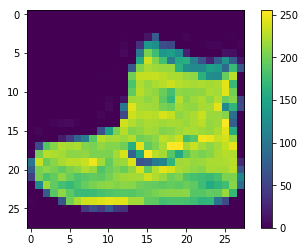

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The current greyscale values range from 0-255. We need them to range between 0-1.

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To confirm that the images ae ready for training lets look at the first 10 images.

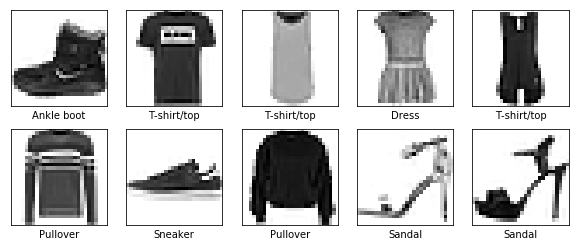

In [13]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

So now lets build our model. First we need to configure the layers. 

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer 'flatten' turns the 28x28 2 dimensional array into a 784 1 dimensional array. There's no learning in this step, just reformatting. After the pixels are flattened, the network consists of a sequence of two dense layers. These are densely connected, or fully connected, neural layers. The first dense layer has 128 nodes. The second layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

Now that the model is built we can start to compile. To compile we need a
	Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
	Optimizer —This is how the model is updated based on the data it sees and its loss function.
	Metrics —Used to monitor the training and testing steps, we'll use accuracy, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now that everything is setup we can start to train the model. This is easy in Keras as we just use keras.fit and pass the training images and labels as well as the number of epochs we would like to train for.

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
   32/60000 [..............................] - ETA: 13s - loss: 0.7610 - accuracy: 0.6562

  576/60000 [..............................] - ETA: 6s - loss: 0.3960 - accuracy: 0.8490 

 1088/60000 [..............................] - ETA: 6s - loss: 0.4228 - accuracy: 0.8474

 1536/60000 [..............................] - ETA: 6s - loss: 0.4293 - accuracy: 0.8398

 1888/60000 [..............................] - ETA: 6s - loss: 0.4361 - accuracy: 0.8400

 2432/60000 [>.............................] - ETA: 6s - loss: 0.4253 - accuracy: 0.8405

 2848/60000 [>.............................] - ETA: 6s - loss: 0.4266 - accuracy: 0.8413

 3264/60000 [>.............................] - ETA: 6s - loss: 0.4248 - accuracy: 0.8428

 3744/60000 [>.............................] - ETA: 6s - loss: 0.4243 - accuracy: 0.8456

 4096/60000 [=>............................] - ETA: 6s - loss: 0.4232 - accuracy: 0.8462

 4448/60000 [=>............................] - ETA: 6s - loss: 0.4341 - accuracy: 0.8433

 5056/60000 [=>............................] - ETA: 6s - loss: 0.4399 - accuracy: 0.8436

 5568/60000 [=>............................] - ETA: 6s - loss: 0.4416 - accuracy: 0.8429

 6240/60000 [==>...........................] - ETA: 6s - loss: 0.4416 - accuracy: 0.8425

 6848/60000 [==>...........................] - ETA: 5s - loss: 0.4373 - accuracy: 0.8443

 7552/60000 [==>...........................] - ETA: 5s - loss: 0.4371 - accuracy: 0.8438

 8224/60000 [===>..........................] - ETA: 5s - loss: 0.4344 - accuracy: 0.8455

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.4369 - accuracy: 0.8448

 9664/60000 [===>..........................] - ETA: 5s - loss: 0.4362 - accuracy: 0.8449

10400/60000 [====>.........................] - ETA: 4s - loss: 0.4336 - accuracy: 0.8471

11168/60000 [====>.........................] - ETA: 4s - loss: 0.4329 - accuracy: 0.8472

11904/60000 [====>.........................] - ETA: 4s - loss: 0.4364 - accuracy: 0.8459

12672/60000 [=====>........................] - ETA: 4s - loss: 0.4352 - accuracy: 0.8463

13408/60000 [=====>........................] - ETA: 4s - loss: 0.4345 - accuracy: 0.8469

14176/60000 [======>.......................] - ETA: 4s - loss: 0.4360 - accuracy: 0.8464

14912/60000 [======>.......................] - ETA: 3s - loss: 0.4355 - accuracy: 0.8468

15456/60000 [======>.......................] - ETA: 3s - loss: 0.4358 - accuracy: 0.8470

16160/60000 [=======>......................] - ETA: 3s - loss: 0.4347 - accuracy: 0.8467

16800/60000 [=======>......................] - ETA: 3s - loss: 0.4342 - accuracy: 0.8468

17440/60000 [=======>......................] - ETA: 3s - loss: 0.4343 - accuracy: 0.8466

18176/60000 [========>.....................] - ETA: 3s - loss: 0.4340 - accuracy: 0.8466

18976/60000 [========>.....................] - ETA: 3s - loss: 0.4322 - accuracy: 0.8470

19744/60000 [========>.....................] - ETA: 3s - loss: 0.4315 - accuracy: 0.8479

20448/60000 [=========>....................] - ETA: 3s - loss: 0.4301 - accuracy: 0.8489

21152/60000 [=========>....................] - ETA: 3s - loss: 0.4308 - accuracy: 0.8484

21856/60000 [=========>....................] - ETA: 3s - loss: 0.4309 - accuracy: 0.8479

22560/60000 [==========>...................] - ETA: 3s - loss: 0.4327 - accuracy: 0.8476

23200/60000 [==========>...................] - ETA: 3s - loss: 0.4322 - accuracy: 0.8475

24096/60000 [===========>..................] - ETA: 2s - loss: 0.4328 - accuracy: 0.8473

24704/60000 [===========>..................] - ETA: 2s - loss: 0.4315 - accuracy: 0.8477

25632/60000 [===========>..................] - ETA: 2s - loss: 0.4304 - accuracy: 0.8482

26592/60000 [============>.................] - ETA: 2s - loss: 0.4291 - accuracy: 0.8488

27488/60000 [============>.................] - ETA: 2s - loss: 0.4298 - accuracy: 0.8492

28448/60000 [=============>................] - ETA: 2s - loss: 0.4292 - accuracy: 0.8499

29344/60000 [=============>................] - ETA: 2s - loss: 0.4290 - accuracy: 0.8501

30272/60000 [==============>...............] - ETA: 2s - loss: 0.4287 - accuracy: 0.8502

31200/60000 [==============>...............] - ETA: 2s - loss: 0.4280 - accuracy: 0.8506

32160/60000 [===============>..............] - ETA: 2s - loss: 0.4278 - accuracy: 0.8505

33088/60000 [===============>..............] - ETA: 2s - loss: 0.4267 - accuracy: 0.8507

34016/60000 [================>.............] - ETA: 1s - loss: 0.4264 - accuracy: 0.8508

34912/60000 [================>.............] - ETA: 1s - loss: 0.4260 - accuracy: 0.8509

35840/60000 [================>.............] - ETA: 1s - loss: 0.4263 - accuracy: 0.8505

36800/60000 [=================>............] - ETA: 1s - loss: 0.4259 - accuracy: 0.8508

37760/60000 [=================>............] - ETA: 1s - loss: 0.4258 - accuracy: 0.8507

38688/60000 [==================>...........] - ETA: 1s - loss: 0.4262 - accuracy: 0.8509

39648/60000 [==================>...........] - ETA: 1s - loss: 0.4263 - accuracy: 0.8507

40608/60000 [===================>..........] - ETA: 1s - loss: 0.4269 - accuracy: 0.8507

41536/60000 [===================>..........] - ETA: 1s - loss: 0.4269 - accuracy: 0.8506

42496/60000 [====================>.........] - ETA: 1s - loss: 0.4262 - accuracy: 0.8509

43424/60000 [====================>.........] - ETA: 1s - loss: 0.4266 - accuracy: 0.8506

44384/60000 [=====================>........] - ETA: 1s - loss: 0.4257 - accuracy: 0.8509

45344/60000 [=====================>........] - ETA: 1s - loss: 0.4267 - accuracy: 0.8508

46336/60000 [======================>.......] - ETA: 0s - loss: 0.4262 - accuracy: 0.8510

47296/60000 [======================>.......] - ETA: 0s - loss: 0.4261 - accuracy: 0.8508

48256/60000 [=======================>......] - ETA: 0s - loss: 0.4259 - accuracy: 0.8507

49152/60000 [=======================>......] - ETA: 0s - loss: 0.4262 - accuracy: 0.8504

50112/60000 [========================>.....] - ETA: 0s - loss: 0.4258 - accuracy: 0.8504

51040/60000 [========================>.....] - ETA: 0s - loss: 0.4258 - accuracy: 0.8504

51936/60000 [========================>.....] - ETA: 0s - loss: 0.4263 - accuracy: 0.8500

52800/60000 [=========================>....] - ETA: 0s - loss: 0.4261 - accuracy: 0.8502

53760/60000 [=========================>....] - ETA: 0s - loss: 0.4253 - accuracy: 0.8506

54656/60000 [==========================>...] - ETA: 0s - loss: 0.4251 - accuracy: 0.8507

55616/60000 [==========================>...] - ETA: 0s - loss: 0.4251 - accuracy: 0.8506

56512/60000 [===========================>..] - ETA: 0s - loss: 0.4249 - accuracy: 0.8507

57472/60000 [===========================>..] - ETA: 0s - loss: 0.4247 - accuracy: 0.8509

58176/60000 [============================>.] - ETA: 0s - loss: 0.4247 - accuracy: 0.8508

59104/60000 [============================>.] - ETA: 0s - loss: 0.4245 - accuracy: 0.8509

60000/60000 [==============================] - 4s 66us/sample - loss: 0.4241 - accuracy: 0.8513


Epoch 2/10
   32/60000 [..............................] - ETA: 11s - loss: 0.3295 - accuracy: 0.8750

  800/60000 [..............................] - ETA: 4s - loss: 0.4028 - accuracy: 0.8487 

 1664/60000 [..............................] - ETA: 3s - loss: 0.4096 - accuracy: 0.8492

 2560/60000 [>.............................] - ETA: 3s - loss: 0.4121 - accuracy: 0.8539

 3488/60000 [>.............................] - ETA: 3s - loss: 0.4115 - accuracy: 0.8532

 4448/60000 [=>............................] - ETA: 3s - loss: 0.4079 - accuracy: 0.8575

 5376/60000 [=>............................] - ETA: 3s - loss: 0.4127 - accuracy: 0.8553

 6336/60000 [==>...........................] - ETA: 3s - loss: 0.4194 - accuracy: 0.8529

 7264/60000 [==>...........................] - ETA: 2s - loss: 0.4198 - accuracy: 0.8528

 8256/60000 [===>..........................] - ETA: 2s - loss: 0.4206 - accuracy: 0.8522

 9184/60000 [===>..........................] - ETA: 2s - loss: 0.4211 - accuracy: 0.8524

10144/60000 [====>.........................] - ETA: 2s - loss: 0.4178 - accuracy: 0.8528

11040/60000 [====>.........................] - ETA: 2s - loss: 0.4183 - accuracy: 0.8525

12000/60000 [=====>........................] - ETA: 2s - loss: 0.4201 - accuracy: 0.8524

12928/60000 [=====>........................] - ETA: 2s - loss: 0.4197 - accuracy: 0.8534

13888/60000 [=====>........................] - ETA: 2s - loss: 0.4213 - accuracy: 0.8526

14816/60000 [======>.......................] - ETA: 2s - loss: 0.4215 - accuracy: 0.8529

15680/60000 [======>.......................] - ETA: 2s - loss: 0.4211 - accuracy: 0.8534

16608/60000 [=======>......................] - ETA: 2s - loss: 0.4196 - accuracy: 0.8543

17536/60000 [=======>......................] - ETA: 2s - loss: 0.4188 - accuracy: 0.8548

18464/60000 [========>.....................] - ETA: 2s - loss: 0.4192 - accuracy: 0.8544

19392/60000 [========>.....................] - ETA: 2s - loss: 0.4211 - accuracy: 0.8531

20288/60000 [=========>....................] - ETA: 2s - loss: 0.4224 - accuracy: 0.8524

21248/60000 [=========>....................] - ETA: 2s - loss: 0.4217 - accuracy: 0.8527

22176/60000 [==========>...................] - ETA: 2s - loss: 0.4212 - accuracy: 0.8529

23136/60000 [==========>...................] - ETA: 2s - loss: 0.4198 - accuracy: 0.8532

24032/60000 [===========>..................] - ETA: 1s - loss: 0.4187 - accuracy: 0.8539

24992/60000 [===========>..................] - ETA: 1s - loss: 0.4181 - accuracy: 0.8540

25888/60000 [===========>..................] - ETA: 1s - loss: 0.4172 - accuracy: 0.8543

26752/60000 [============>.................] - ETA: 1s - loss: 0.4169 - accuracy: 0.8547

27648/60000 [============>.................] - ETA: 1s - loss: 0.4157 - accuracy: 0.8553

28544/60000 [=============>................] - ETA: 1s - loss: 0.4155 - accuracy: 0.8552

29472/60000 [=============>................] - ETA: 1s - loss: 0.4156 - accuracy: 0.8552

30400/60000 [==============>...............] - ETA: 1s - loss: 0.4166 - accuracy: 0.8550

31360/60000 [==============>...............] - ETA: 1s - loss: 0.4178 - accuracy: 0.8542

32256/60000 [===============>..............] - ETA: 1s - loss: 0.4190 - accuracy: 0.8539

33216/60000 [===============>..............] - ETA: 1s - loss: 0.4192 - accuracy: 0.8540

34080/60000 [================>.............] - ETA: 1s - loss: 0.4190 - accuracy: 0.8542

35040/60000 [================>.............] - ETA: 1s - loss: 0.4185 - accuracy: 0.8543

35968/60000 [================>.............] - ETA: 1s - loss: 0.4189 - accuracy: 0.8542

36928/60000 [=================>............] - ETA: 1s - loss: 0.4178 - accuracy: 0.8545

37824/60000 [=================>............] - ETA: 1s - loss: 0.4174 - accuracy: 0.8544

38752/60000 [==================>...........] - ETA: 1s - loss: 0.4171 - accuracy: 0.8546

39648/60000 [==================>...........] - ETA: 1s - loss: 0.4176 - accuracy: 0.8544

40608/60000 [===================>..........] - ETA: 1s - loss: 0.4169 - accuracy: 0.8544

41536/60000 [===================>..........] - ETA: 1s - loss: 0.4171 - accuracy: 0.8542

42496/60000 [====================>.........] - ETA: 0s - loss: 0.4174 - accuracy: 0.8537

43392/60000 [====================>.........] - ETA: 0s - loss: 0.4175 - accuracy: 0.8535

44352/60000 [=====================>........] - ETA: 0s - loss: 0.4188 - accuracy: 0.8530

45248/60000 [=====================>........] - ETA: 0s - loss: 0.4183 - accuracy: 0.8532

46176/60000 [======================>.......] - ETA: 0s - loss: 0.4169 - accuracy: 0.8536

47008/60000 [======================>.......] - ETA: 0s - loss: 0.4172 - accuracy: 0.8533

47936/60000 [======================>.......] - ETA: 0s - loss: 0.4164 - accuracy: 0.8535

48864/60000 [=======================>......] - ETA: 0s - loss: 0.4175 - accuracy: 0.8532

49824/60000 [=======================>......] - ETA: 0s - loss: 0.4177 - accuracy: 0.8532

50720/60000 [========================>.....] - ETA: 0s - loss: 0.4175 - accuracy: 0.8536

51680/60000 [========================>.....] - ETA: 0s - loss: 0.4184 - accuracy: 0.8532

52608/60000 [=========================>....] - ETA: 0s - loss: 0.4186 - accuracy: 0.8529

53568/60000 [=========================>....] - ETA: 0s - loss: 0.4182 - accuracy: 0.8530

54464/60000 [==========================>...] - ETA: 0s - loss: 0.4179 - accuracy: 0.8531

55392/60000 [==========================>...] - ETA: 0s - loss: 0.4184 - accuracy: 0.8529

56224/60000 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8531

57120/60000 [===========================>..] - ETA: 0s - loss: 0.4178 - accuracy: 0.8531

58048/60000 [============================>.] - ETA: 0s - loss: 0.4183 - accuracy: 0.8531

59008/60000 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.8531

59936/60000 [============================>.] - ETA: 0s - loss: 0.4177 - accuracy: 0.8533

60000/60000 [==============================] - 3s 55us/sample - loss: 0.4179 - accuracy: 0.8533


Epoch 3/10
   32/60000 [..............................] - ETA: 8s - loss: 0.5306 - accuracy: 0.8125

  800/60000 [..............................] - ETA: 4s - loss: 0.3993 - accuracy: 0.8537

 1664/60000 [..............................] - ETA: 3s - loss: 0.4034 - accuracy: 0.8642

 2592/60000 [>.............................] - ETA: 3s - loss: 0.4057 - accuracy: 0.8619

 3488/60000 [>.............................] - ETA: 3s - loss: 0.4135 - accuracy: 0.8558

 4384/60000 [=>............................] - ETA: 3s - loss: 0.4085 - accuracy: 0.8552

 5312/60000 [=>............................] - ETA: 3s - loss: 0.4065 - accuracy: 0.8564

 6272/60000 [==>...........................] - ETA: 3s - loss: 0.4129 - accuracy: 0.8559

 7232/60000 [==>...........................] - ETA: 3s - loss: 0.4188 - accuracy: 0.8526

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.4185 - accuracy: 0.8513

 9120/60000 [===>..........................] - ETA: 2s - loss: 0.4184 - accuracy: 0.8518

10080/60000 [====>.........................] - ETA: 2s - loss: 0.4179 - accuracy: 0.8538

11008/60000 [====>.........................] - ETA: 2s - loss: 0.4143 - accuracy: 0.8555

11904/60000 [====>.........................] - ETA: 2s - loss: 0.4150 - accuracy: 0.8557

12864/60000 [=====>........................] - ETA: 2s - loss: 0.4171 - accuracy: 0.8549

13696/60000 [=====>........................] - ETA: 2s - loss: 0.4177 - accuracy: 0.8548

14624/60000 [======>.......................] - ETA: 2s - loss: 0.4169 - accuracy: 0.8551

15520/60000 [======>.......................] - ETA: 2s - loss: 0.4157 - accuracy: 0.8545

16480/60000 [=======>......................] - ETA: 2s - loss: 0.4174 - accuracy: 0.8539

17376/60000 [=======>......................] - ETA: 2s - loss: 0.4163 - accuracy: 0.8544

18304/60000 [========>.....................] - ETA: 2s - loss: 0.4156 - accuracy: 0.8547

19200/60000 [========>.....................] - ETA: 2s - loss: 0.4147 - accuracy: 0.8553

20128/60000 [=========>....................] - ETA: 2s - loss: 0.4145 - accuracy: 0.8553

20992/60000 [=========>....................] - ETA: 2s - loss: 0.4141 - accuracy: 0.8559

21920/60000 [=========>....................] - ETA: 2s - loss: 0.4146 - accuracy: 0.8562

22496/60000 [==========>...................] - ETA: 2s - loss: 0.4139 - accuracy: 0.8558

23424/60000 [==========>...................] - ETA: 2s - loss: 0.4153 - accuracy: 0.8553

24352/60000 [===========>..................] - ETA: 2s - loss: 0.4155 - accuracy: 0.8550

25312/60000 [===========>..................] - ETA: 1s - loss: 0.4156 - accuracy: 0.8550

26240/60000 [============>.................] - ETA: 1s - loss: 0.4149 - accuracy: 0.8552

27200/60000 [============>.................] - ETA: 1s - loss: 0.4157 - accuracy: 0.8547

28128/60000 [=============>................] - ETA: 1s - loss: 0.4162 - accuracy: 0.8544

29088/60000 [=============>................] - ETA: 1s - loss: 0.4170 - accuracy: 0.8541

29984/60000 [=============>................] - ETA: 1s - loss: 0.4171 - accuracy: 0.8540

30976/60000 [==============>...............] - ETA: 1s - loss: 0.4162 - accuracy: 0.8543

31840/60000 [==============>...............] - ETA: 1s - loss: 0.4159 - accuracy: 0.8546

32800/60000 [===============>..............] - ETA: 1s - loss: 0.4168 - accuracy: 0.8545

33728/60000 [===============>..............] - ETA: 1s - loss: 0.4196 - accuracy: 0.8535

34656/60000 [================>.............] - ETA: 1s - loss: 0.4184 - accuracy: 0.8538

35584/60000 [================>.............] - ETA: 1s - loss: 0.4185 - accuracy: 0.8536

36544/60000 [=================>............] - ETA: 1s - loss: 0.4173 - accuracy: 0.8541

37472/60000 [=================>............] - ETA: 1s - loss: 0.4169 - accuracy: 0.8540

38400/60000 [==================>...........] - ETA: 1s - loss: 0.4171 - accuracy: 0.8538

39328/60000 [==================>...........] - ETA: 1s - loss: 0.4163 - accuracy: 0.8541

40192/60000 [===================>..........] - ETA: 1s - loss: 0.4152 - accuracy: 0.8544

41088/60000 [===================>..........] - ETA: 1s - loss: 0.4152 - accuracy: 0.8543

42016/60000 [====================>.........] - ETA: 1s - loss: 0.4152 - accuracy: 0.8545

42944/60000 [====================>.........] - ETA: 0s - loss: 0.4154 - accuracy: 0.8545

43904/60000 [====================>.........] - ETA: 0s - loss: 0.4144 - accuracy: 0.8550

44800/60000 [=====================>........] - ETA: 0s - loss: 0.4142 - accuracy: 0.8552

45728/60000 [=====================>........] - ETA: 0s - loss: 0.4141 - accuracy: 0.8551

46688/60000 [======================>.......] - ETA: 0s - loss: 0.4135 - accuracy: 0.8555

47648/60000 [======================>.......] - ETA: 0s - loss: 0.4137 - accuracy: 0.8551

48544/60000 [=======================>......] - ETA: 0s - loss: 0.4131 - accuracy: 0.8555

49440/60000 [=======================>......] - ETA: 0s - loss: 0.4130 - accuracy: 0.8555

50336/60000 [========================>.....] - ETA: 0s - loss: 0.4134 - accuracy: 0.8554

51264/60000 [========================>.....] - ETA: 0s - loss: 0.4132 - accuracy: 0.8556

52192/60000 [=========================>....] - ETA: 0s - loss: 0.4129 - accuracy: 0.8557

53120/60000 [=========================>....] - ETA: 0s - loss: 0.4127 - accuracy: 0.8557

54016/60000 [==========================>...] - ETA: 0s - loss: 0.4122 - accuracy: 0.8555

54976/60000 [==========================>...] - ETA: 0s - loss: 0.4119 - accuracy: 0.8557

55936/60000 [==========================>...] - ETA: 0s - loss: 0.4116 - accuracy: 0.8557

56896/60000 [===========================>..] - ETA: 0s - loss: 0.4119 - accuracy: 0.8556

57792/60000 [===========================>..] - ETA: 0s - loss: 0.4115 - accuracy: 0.8556

58688/60000 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8556

59616/60000 [============================>.] - ETA: 0s - loss: 0.4119 - accuracy: 0.8555

60000/60000 [==============================] - 3s 56us/sample - loss: 0.4122 - accuracy: 0.8554


Epoch 4/10
   32/60000 [..............................] - ETA: 8s - loss: 0.3866 - accuracy: 0.8750

  800/60000 [..............................] - ETA: 4s - loss: 0.4311 - accuracy: 0.8575

 1664/60000 [..............................] - ETA: 3s - loss: 0.4341 - accuracy: 0.8576

 2592/60000 [>.............................] - ETA: 3s - loss: 0.4048 - accuracy: 0.8661

 3520/60000 [>.............................] - ETA: 3s - loss: 0.3956 - accuracy: 0.8670

 4416/60000 [=>............................] - ETA: 3s - loss: 0.3988 - accuracy: 0.8641

 5344/60000 [=>............................] - ETA: 3s - loss: 0.3913 - accuracy: 0.8656

 6272/60000 [==>...........................] - ETA: 3s - loss: 0.3927 - accuracy: 0.8653

 7136/60000 [==>...........................] - ETA: 3s - loss: 0.3980 - accuracy: 0.8639

 8032/60000 [===>..........................] - ETA: 2s - loss: 0.4030 - accuracy: 0.8603

 8928/60000 [===>..........................] - ETA: 2s - loss: 0.4077 - accuracy: 0.8574

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.4112 - accuracy: 0.8561

10752/60000 [====>.........................] - ETA: 2s - loss: 0.4145 - accuracy: 0.8555

11680/60000 [====>.........................] - ETA: 2s - loss: 0.4131 - accuracy: 0.8568

12608/60000 [=====>........................] - ETA: 2s - loss: 0.4138 - accuracy: 0.8565

13536/60000 [=====>........................] - ETA: 2s - loss: 0.4122 - accuracy: 0.8561

14464/60000 [======>.......................] - ETA: 2s - loss: 0.4114 - accuracy: 0.8558

15424/60000 [======>.......................] - ETA: 2s - loss: 0.4097 - accuracy: 0.8566

16320/60000 [=======>......................] - ETA: 2s - loss: 0.4107 - accuracy: 0.8561

17216/60000 [=======>......................] - ETA: 2s - loss: 0.4116 - accuracy: 0.8553

18144/60000 [========>.....................] - ETA: 2s - loss: 0.4112 - accuracy: 0.8545

19072/60000 [========>.....................] - ETA: 2s - loss: 0.4104 - accuracy: 0.8551

20032/60000 [=========>....................] - ETA: 2s - loss: 0.4112 - accuracy: 0.8547

20960/60000 [=========>....................] - ETA: 2s - loss: 0.4125 - accuracy: 0.8541

21920/60000 [=========>....................] - ETA: 2s - loss: 0.4124 - accuracy: 0.8544

22752/60000 [==========>...................] - ETA: 2s - loss: 0.4101 - accuracy: 0.8555

23712/60000 [==========>...................] - ETA: 2s - loss: 0.4090 - accuracy: 0.8561

24672/60000 [===========>..................] - ETA: 1s - loss: 0.4099 - accuracy: 0.8560

25536/60000 [===========>..................] - ETA: 1s - loss: 0.4106 - accuracy: 0.8556

26496/60000 [============>.................] - ETA: 1s - loss: 0.4102 - accuracy: 0.8556

27392/60000 [============>.................] - ETA: 1s - loss: 0.4089 - accuracy: 0.8561

28352/60000 [=============>................] - ETA: 1s - loss: 0.4077 - accuracy: 0.8568

29280/60000 [=============>................] - ETA: 1s - loss: 0.4072 - accuracy: 0.8569

30240/60000 [==============>...............] - ETA: 1s - loss: 0.4084 - accuracy: 0.8566

31200/60000 [==============>...............] - ETA: 1s - loss: 0.4090 - accuracy: 0.8564

32160/60000 [===============>..............] - ETA: 1s - loss: 0.4092 - accuracy: 0.8561

33056/60000 [===============>..............] - ETA: 1s - loss: 0.4084 - accuracy: 0.8562

33984/60000 [===============>..............] - ETA: 1s - loss: 0.4074 - accuracy: 0.8566

34848/60000 [================>.............] - ETA: 1s - loss: 0.4069 - accuracy: 0.8566

35808/60000 [================>.............] - ETA: 1s - loss: 0.4068 - accuracy: 0.8567

36704/60000 [=================>............] - ETA: 1s - loss: 0.4072 - accuracy: 0.8567

37632/60000 [=================>............] - ETA: 1s - loss: 0.4065 - accuracy: 0.8568

38592/60000 [==================>...........] - ETA: 1s - loss: 0.4062 - accuracy: 0.8569

39552/60000 [==================>...........] - ETA: 1s - loss: 0.4064 - accuracy: 0.8570

40448/60000 [===================>..........] - ETA: 1s - loss: 0.4067 - accuracy: 0.8571

41408/60000 [===================>..........] - ETA: 1s - loss: 0.4063 - accuracy: 0.8572

42336/60000 [====================>.........] - ETA: 0s - loss: 0.4069 - accuracy: 0.8572

43296/60000 [====================>.........] - ETA: 0s - loss: 0.4068 - accuracy: 0.8571

44128/60000 [=====================>........] - ETA: 0s - loss: 0.4063 - accuracy: 0.8572

45056/60000 [=====================>........] - ETA: 0s - loss: 0.4065 - accuracy: 0.8570

45952/60000 [=====================>........] - ETA: 0s - loss: 0.4065 - accuracy: 0.8571

46880/60000 [======================>.......] - ETA: 0s - loss: 0.4070 - accuracy: 0.8568

47808/60000 [======================>.......] - ETA: 0s - loss: 0.4069 - accuracy: 0.8569

48736/60000 [=======================>......] - ETA: 0s - loss: 0.4061 - accuracy: 0.8570

49664/60000 [=======================>......] - ETA: 0s - loss: 0.4062 - accuracy: 0.8570

50656/60000 [========================>.....] - ETA: 0s - loss: 0.4058 - accuracy: 0.8572

51616/60000 [========================>.....] - ETA: 0s - loss: 0.4060 - accuracy: 0.8572

52576/60000 [=========================>....] - ETA: 0s - loss: 0.4053 - accuracy: 0.8575

53408/60000 [=========================>....] - ETA: 0s - loss: 0.4056 - accuracy: 0.8575

54368/60000 [==========================>...] - ETA: 0s - loss: 0.4065 - accuracy: 0.8572

55264/60000 [==========================>...] - ETA: 0s - loss: 0.4060 - accuracy: 0.8575

56224/60000 [===========================>..] - ETA: 0s - loss: 0.4069 - accuracy: 0.8573

57120/60000 [===========================>..] - ETA: 0s - loss: 0.4071 - accuracy: 0.8571

58080/60000 [============================>.] - ETA: 0s - loss: 0.4070 - accuracy: 0.8572

59008/60000 [============================>.] - ETA: 0s - loss: 0.4064 - accuracy: 0.8574

59968/60000 [============================>.] - ETA: 0s - loss: 0.4066 - accuracy: 0.8575

60000/60000 [==============================] - 3s 55us/sample - loss: 0.4066 - accuracy: 0.8575


Epoch 5/10
   32/60000 [..............................] - ETA: 7s - loss: 0.5051 - accuracy: 0.7812

  768/60000 [..............................] - ETA: 4s - loss: 0.4056 - accuracy: 0.8385

 1536/60000 [..............................] - ETA: 4s - loss: 0.4026 - accuracy: 0.8470

 2464/60000 [>.............................] - ETA: 3s - loss: 0.4268 - accuracy: 0.8438

 3392/60000 [>.............................] - ETA: 3s - loss: 0.4155 - accuracy: 0.8491

 4288/60000 [=>............................] - ETA: 3s - loss: 0.4140 - accuracy: 0.8486

 5248/60000 [=>............................] - ETA: 3s - loss: 0.4072 - accuracy: 0.8516

 6176/60000 [==>...........................] - ETA: 3s - loss: 0.4097 - accuracy: 0.8546

 7104/60000 [==>...........................] - ETA: 3s - loss: 0.4081 - accuracy: 0.8547

 8032/60000 [===>..........................] - ETA: 2s - loss: 0.4110 - accuracy: 0.8550

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.4084 - accuracy: 0.8552

 9888/60000 [===>..........................] - ETA: 2s - loss: 0.4114 - accuracy: 0.8538

10816/60000 [====>.........................] - ETA: 2s - loss: 0.4152 - accuracy: 0.8523

11776/60000 [====>.........................] - ETA: 2s - loss: 0.4121 - accuracy: 0.8534

12736/60000 [=====>........................] - ETA: 2s - loss: 0.4104 - accuracy: 0.8543

13664/60000 [=====>........................] - ETA: 2s - loss: 0.4086 - accuracy: 0.8550

14592/60000 [======>.......................] - ETA: 2s - loss: 0.4070 - accuracy: 0.8557

15552/60000 [======>.......................] - ETA: 2s - loss: 0.4087 - accuracy: 0.8555

16448/60000 [=======>......................] - ETA: 2s - loss: 0.4078 - accuracy: 0.8558

17408/60000 [=======>......................] - ETA: 2s - loss: 0.4073 - accuracy: 0.8559

18336/60000 [========>.....................] - ETA: 2s - loss: 0.4088 - accuracy: 0.8550

19296/60000 [========>.....................] - ETA: 2s - loss: 0.4083 - accuracy: 0.8553

20160/60000 [=========>....................] - ETA: 2s - loss: 0.4082 - accuracy: 0.8553

21088/60000 [=========>....................] - ETA: 2s - loss: 0.4076 - accuracy: 0.8562

21952/60000 [=========>....................] - ETA: 2s - loss: 0.4071 - accuracy: 0.8564

22912/60000 [==========>...................] - ETA: 2s - loss: 0.4076 - accuracy: 0.8565

23840/60000 [==========>...................] - ETA: 2s - loss: 0.4069 - accuracy: 0.8567

24768/60000 [===========>..................] - ETA: 1s - loss: 0.4064 - accuracy: 0.8571

25664/60000 [===========>..................] - ETA: 1s - loss: 0.4064 - accuracy: 0.8566

26624/60000 [============>.................] - ETA: 1s - loss: 0.4064 - accuracy: 0.8569

27520/60000 [============>.................] - ETA: 1s - loss: 0.4049 - accuracy: 0.8574

28448/60000 [=============>................] - ETA: 1s - loss: 0.4037 - accuracy: 0.8576

29312/60000 [=============>................] - ETA: 1s - loss: 0.4041 - accuracy: 0.8578

30272/60000 [==============>...............] - ETA: 1s - loss: 0.4050 - accuracy: 0.8576

31168/60000 [==============>...............] - ETA: 1s - loss: 0.4061 - accuracy: 0.8576

32064/60000 [===============>..............] - ETA: 1s - loss: 0.4058 - accuracy: 0.8578

32960/60000 [===============>..............] - ETA: 1s - loss: 0.4044 - accuracy: 0.8581

33888/60000 [===============>..............] - ETA: 1s - loss: 0.4043 - accuracy: 0.8579

34720/60000 [================>.............] - ETA: 1s - loss: 0.4043 - accuracy: 0.8580

35648/60000 [================>.............] - ETA: 1s - loss: 0.4046 - accuracy: 0.8580

36512/60000 [=================>............] - ETA: 1s - loss: 0.4041 - accuracy: 0.8584

37440/60000 [=================>............] - ETA: 1s - loss: 0.4048 - accuracy: 0.8581

38272/60000 [==================>...........] - ETA: 1s - loss: 0.4048 - accuracy: 0.8580

39136/60000 [==================>...........] - ETA: 1s - loss: 0.4047 - accuracy: 0.8581

40000/60000 [===================>..........] - ETA: 1s - loss: 0.4035 - accuracy: 0.8585

40896/60000 [===================>..........] - ETA: 1s - loss: 0.4045 - accuracy: 0.8582

41792/60000 [===================>..........] - ETA: 1s - loss: 0.4035 - accuracy: 0.8585

42752/60000 [====================>.........] - ETA: 0s - loss: 0.4035 - accuracy: 0.8585

43648/60000 [====================>.........] - ETA: 0s - loss: 0.4041 - accuracy: 0.8583

44576/60000 [=====================>........] - ETA: 0s - loss: 0.4041 - accuracy: 0.8582

45504/60000 [=====================>........] - ETA: 0s - loss: 0.4033 - accuracy: 0.8584

46432/60000 [======================>.......] - ETA: 0s - loss: 0.4025 - accuracy: 0.8585

47264/60000 [======================>.......] - ETA: 0s - loss: 0.4017 - accuracy: 0.8591

48224/60000 [=======================>......] - ETA: 0s - loss: 0.4030 - accuracy: 0.8586

49056/60000 [=======================>......] - ETA: 0s - loss: 0.4035 - accuracy: 0.8586

49984/60000 [=======================>......] - ETA: 0s - loss: 0.4035 - accuracy: 0.8586

50880/60000 [========================>.....] - ETA: 0s - loss: 0.4032 - accuracy: 0.8587

51808/60000 [========================>.....] - ETA: 0s - loss: 0.4028 - accuracy: 0.8586

52704/60000 [=========================>....] - ETA: 0s - loss: 0.4024 - accuracy: 0.8588

53632/60000 [=========================>....] - ETA: 0s - loss: 0.4027 - accuracy: 0.8587

54528/60000 [==========================>...] - ETA: 0s - loss: 0.4028 - accuracy: 0.8584

55456/60000 [==========================>...] - ETA: 0s - loss: 0.4024 - accuracy: 0.8586

56320/60000 [===========================>..] - ETA: 0s - loss: 0.4020 - accuracy: 0.8586

57248/60000 [===========================>..] - ETA: 0s - loss: 0.4016 - accuracy: 0.8585

58112/60000 [============================>.] - ETA: 0s - loss: 0.4019 - accuracy: 0.8585

59072/60000 [============================>.] - ETA: 0s - loss: 0.4020 - accuracy: 0.8585

59840/60000 [============================>.] - ETA: 0s - loss: 0.4019 - accuracy: 0.8585

60000/60000 [==============================] - 3s 56us/sample - loss: 0.4021 - accuracy: 0.8585


Epoch 6/10
   32/60000 [..............................] - ETA: 8s - loss: 0.2923 - accuracy: 0.9375

  768/60000 [..............................] - ETA: 4s - loss: 0.3696 - accuracy: 0.8581

 1696/60000 [..............................] - ETA: 3s - loss: 0.3924 - accuracy: 0.8496

 2592/60000 [>.............................] - ETA: 3s - loss: 0.3992 - accuracy: 0.8526

 3424/60000 [>.............................] - ETA: 3s - loss: 0.3972 - accuracy: 0.8584

 4256/60000 [=>............................] - ETA: 3s - loss: 0.3922 - accuracy: 0.8578

 5152/60000 [=>............................] - ETA: 3s - loss: 0.3971 - accuracy: 0.8566

 6080/60000 [==>...........................] - ETA: 3s - loss: 0.3984 - accuracy: 0.8574

 7008/60000 [==>...........................] - ETA: 3s - loss: 0.3960 - accuracy: 0.8584

 7744/60000 [==>...........................] - ETA: 3s - loss: 0.3944 - accuracy: 0.8585

 8672/60000 [===>..........................] - ETA: 3s - loss: 0.3974 - accuracy: 0.8576

 9568/60000 [===>..........................] - ETA: 2s - loss: 0.3963 - accuracy: 0.8581

10528/60000 [====>.........................] - ETA: 2s - loss: 0.3983 - accuracy: 0.8583

11424/60000 [====>.........................] - ETA: 2s - loss: 0.3983 - accuracy: 0.8584

12384/60000 [=====>........................] - ETA: 2s - loss: 0.3966 - accuracy: 0.8604

13248/60000 [=====>........................] - ETA: 2s - loss: 0.3998 - accuracy: 0.8599

14176/60000 [======>.......................] - ETA: 2s - loss: 0.3959 - accuracy: 0.8610

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3956 - accuracy: 0.8608

16096/60000 [=======>......................] - ETA: 2s - loss: 0.3960 - accuracy: 0.8610

16992/60000 [=======>......................] - ETA: 2s - loss: 0.3956 - accuracy: 0.8609

17920/60000 [=======>......................] - ETA: 2s - loss: 0.3959 - accuracy: 0.8609

18848/60000 [========>.....................] - ETA: 2s - loss: 0.3969 - accuracy: 0.8609

19744/60000 [========>.....................] - ETA: 2s - loss: 0.3955 - accuracy: 0.8614

20640/60000 [=========>....................] - ETA: 2s - loss: 0.3950 - accuracy: 0.8623

21568/60000 [=========>....................] - ETA: 2s - loss: 0.3956 - accuracy: 0.8623

22432/60000 [==========>...................] - ETA: 2s - loss: 0.3964 - accuracy: 0.8612

23360/60000 [==========>...................] - ETA: 2s - loss: 0.3961 - accuracy: 0.8611

24256/60000 [===========>..................] - ETA: 2s - loss: 0.3967 - accuracy: 0.8612

25152/60000 [===========>..................] - ETA: 1s - loss: 0.3973 - accuracy: 0.8611

26080/60000 [============>.................] - ETA: 1s - loss: 0.3966 - accuracy: 0.8611

26976/60000 [============>.................] - ETA: 1s - loss: 0.3971 - accuracy: 0.8608

27872/60000 [============>.................] - ETA: 1s - loss: 0.3984 - accuracy: 0.8604

28800/60000 [=============>................] - ETA: 1s - loss: 0.3983 - accuracy: 0.8605

29728/60000 [=============>................] - ETA: 1s - loss: 0.3984 - accuracy: 0.8604

30592/60000 [==============>...............] - ETA: 1s - loss: 0.3976 - accuracy: 0.8610

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3975 - accuracy: 0.8608

32384/60000 [===============>..............] - ETA: 1s - loss: 0.3973 - accuracy: 0.8610

33312/60000 [===============>..............] - ETA: 1s - loss: 0.3974 - accuracy: 0.8610

34240/60000 [================>.............] - ETA: 1s - loss: 0.3962 - accuracy: 0.8614

35168/60000 [================>.............] - ETA: 1s - loss: 0.3972 - accuracy: 0.8610

36096/60000 [=================>............] - ETA: 1s - loss: 0.3989 - accuracy: 0.8603

37024/60000 [=================>............] - ETA: 1s - loss: 0.3991 - accuracy: 0.8606

37952/60000 [=================>............] - ETA: 1s - loss: 0.3992 - accuracy: 0.8604

38880/60000 [==================>...........] - ETA: 1s - loss: 0.4007 - accuracy: 0.8598

39776/60000 [==================>...........] - ETA: 1s - loss: 0.4013 - accuracy: 0.8595

40608/60000 [===================>..........] - ETA: 1s - loss: 0.4010 - accuracy: 0.8597

41536/60000 [===================>..........] - ETA: 1s - loss: 0.4009 - accuracy: 0.8598

42464/60000 [====================>.........] - ETA: 0s - loss: 0.4013 - accuracy: 0.8598

43392/60000 [====================>.........] - ETA: 0s - loss: 0.4005 - accuracy: 0.8602

44320/60000 [=====================>........] - ETA: 0s - loss: 0.4000 - accuracy: 0.8606

45248/60000 [=====================>........] - ETA: 0s - loss: 0.4009 - accuracy: 0.8602

46176/60000 [======================>.......] - ETA: 0s - loss: 0.4005 - accuracy: 0.8605

47104/60000 [======================>.......] - ETA: 0s - loss: 0.4001 - accuracy: 0.8608

48032/60000 [=======================>......] - ETA: 0s - loss: 0.3995 - accuracy: 0.8608

48800/60000 [=======================>......] - ETA: 0s - loss: 0.3989 - accuracy: 0.8610

49760/60000 [=======================>......] - ETA: 0s - loss: 0.3986 - accuracy: 0.8613

50720/60000 [========================>.....] - ETA: 0s - loss: 0.3982 - accuracy: 0.8615

51680/60000 [========================>.....] - ETA: 0s - loss: 0.3975 - accuracy: 0.8615

52608/60000 [=========================>....] - ETA: 0s - loss: 0.3977 - accuracy: 0.8616

53568/60000 [=========================>....] - ETA: 0s - loss: 0.3973 - accuracy: 0.8617

54496/60000 [==========================>...] - ETA: 0s - loss: 0.3980 - accuracy: 0.8612

55424/60000 [==========================>...] - ETA: 0s - loss: 0.3976 - accuracy: 0.8615

56352/60000 [===========================>..] - ETA: 0s - loss: 0.3975 - accuracy: 0.8616

57280/60000 [===========================>..] - ETA: 0s - loss: 0.3977 - accuracy: 0.8616

58144/60000 [============================>.] - ETA: 0s - loss: 0.3976 - accuracy: 0.8613

59104/60000 [============================>.] - ETA: 0s - loss: 0.3969 - accuracy: 0.8613

60000/60000 [==============================] - 3s 56us/sample - loss: 0.3972 - accuracy: 0.8612


Epoch 7/10
   32/60000 [..............................] - ETA: 11s - loss: 0.3326 - accuracy: 0.8750

  736/60000 [..............................] - ETA: 4s - loss: 0.4058 - accuracy: 0.8750 

 1536/60000 [..............................] - ETA: 4s - loss: 0.3748 - accuracy: 0.8815

 2464/60000 [>.............................] - ETA: 3s - loss: 0.3798 - accuracy: 0.8766

 3360/60000 [>.............................] - ETA: 3s - loss: 0.3844 - accuracy: 0.8747

 4288/60000 [=>............................] - ETA: 3s - loss: 0.3756 - accuracy: 0.8743

 5216/60000 [=>............................] - ETA: 3s - loss: 0.3842 - accuracy: 0.8702

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.3842 - accuracy: 0.8688

 7008/60000 [==>...........................] - ETA: 3s - loss: 0.3889 - accuracy: 0.8657

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.3908 - accuracy: 0.8658

 8832/60000 [===>..........................] - ETA: 2s - loss: 0.3940 - accuracy: 0.8632

 9792/60000 [===>..........................] - ETA: 2s - loss: 0.3873 - accuracy: 0.8654

10624/60000 [====>.........................] - ETA: 2s - loss: 0.3891 - accuracy: 0.8657

11584/60000 [====>.........................] - ETA: 2s - loss: 0.3930 - accuracy: 0.8644

12480/60000 [=====>........................] - ETA: 2s - loss: 0.3947 - accuracy: 0.8634

13408/60000 [=====>........................] - ETA: 2s - loss: 0.3942 - accuracy: 0.8632

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3947 - accuracy: 0.8623

15232/60000 [======>.......................] - ETA: 2s - loss: 0.3950 - accuracy: 0.8616

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3940 - accuracy: 0.8616

16960/60000 [=======>......................] - ETA: 2s - loss: 0.3931 - accuracy: 0.8619

17824/60000 [=======>......................] - ETA: 2s - loss: 0.3927 - accuracy: 0.8621

18752/60000 [========>.....................] - ETA: 2s - loss: 0.3934 - accuracy: 0.8621

19648/60000 [========>.....................] - ETA: 2s - loss: 0.3944 - accuracy: 0.8617

20576/60000 [=========>....................] - ETA: 2s - loss: 0.3943 - accuracy: 0.8618

21472/60000 [=========>....................] - ETA: 2s - loss: 0.3921 - accuracy: 0.8626

22400/60000 [==========>...................] - ETA: 2s - loss: 0.3937 - accuracy: 0.8620

23296/60000 [==========>...................] - ETA: 2s - loss: 0.3946 - accuracy: 0.8622

24096/60000 [===========>..................] - ETA: 2s - loss: 0.3944 - accuracy: 0.8621

24992/60000 [===========>..................] - ETA: 2s - loss: 0.3939 - accuracy: 0.8619

25920/60000 [===========>..................] - ETA: 1s - loss: 0.3916 - accuracy: 0.8627

26848/60000 [============>.................] - ETA: 1s - loss: 0.3932 - accuracy: 0.8617

27776/60000 [============>.................] - ETA: 1s - loss: 0.3931 - accuracy: 0.8619

28704/60000 [=============>................] - ETA: 1s - loss: 0.3924 - accuracy: 0.8623

29632/60000 [=============>................] - ETA: 1s - loss: 0.3907 - accuracy: 0.8627

30592/60000 [==============>...............] - ETA: 1s - loss: 0.3919 - accuracy: 0.8625

31424/60000 [==============>...............] - ETA: 1s - loss: 0.3912 - accuracy: 0.8627

32352/60000 [===============>..............] - ETA: 1s - loss: 0.3907 - accuracy: 0.8627

33216/60000 [===============>..............] - ETA: 1s - loss: 0.3901 - accuracy: 0.8633

34144/60000 [================>.............] - ETA: 1s - loss: 0.3899 - accuracy: 0.8633

35072/60000 [================>.............] - ETA: 1s - loss: 0.3906 - accuracy: 0.8629

36032/60000 [=================>............] - ETA: 1s - loss: 0.3917 - accuracy: 0.8624

36960/60000 [=================>............] - ETA: 1s - loss: 0.3907 - accuracy: 0.8628

37952/60000 [=================>............] - ETA: 1s - loss: 0.3909 - accuracy: 0.8629

38848/60000 [==================>...........] - ETA: 1s - loss: 0.3918 - accuracy: 0.8625

39808/60000 [==================>...........] - ETA: 1s - loss: 0.3932 - accuracy: 0.8623

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3928 - accuracy: 0.8625

41632/60000 [===================>..........] - ETA: 1s - loss: 0.3929 - accuracy: 0.8624

42464/60000 [====================>.........] - ETA: 0s - loss: 0.3937 - accuracy: 0.8624

43456/60000 [====================>.........] - ETA: 0s - loss: 0.3934 - accuracy: 0.8626

44352/60000 [=====================>........] - ETA: 0s - loss: 0.3943 - accuracy: 0.8624

45312/60000 [=====================>........] - ETA: 0s - loss: 0.3943 - accuracy: 0.8625

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3943 - accuracy: 0.8625

47040/60000 [======================>.......] - ETA: 0s - loss: 0.3941 - accuracy: 0.8624

47968/60000 [======================>.......] - ETA: 0s - loss: 0.3944 - accuracy: 0.8624

48928/60000 [=======================>......] - ETA: 0s - loss: 0.3946 - accuracy: 0.8624

49824/60000 [=======================>......] - ETA: 0s - loss: 0.3948 - accuracy: 0.8623

50688/60000 [========================>.....] - ETA: 0s - loss: 0.3948 - accuracy: 0.8621

51584/60000 [========================>.....] - ETA: 0s - loss: 0.3943 - accuracy: 0.8622

52544/60000 [=========================>....] - ETA: 0s - loss: 0.3938 - accuracy: 0.8622

53440/60000 [=========================>....] - ETA: 0s - loss: 0.3939 - accuracy: 0.8622

54368/60000 [==========================>...] - ETA: 0s - loss: 0.3940 - accuracy: 0.8624

55264/60000 [==========================>...] - ETA: 0s - loss: 0.3937 - accuracy: 0.8624

56224/60000 [===========================>..] - ETA: 0s - loss: 0.3939 - accuracy: 0.8624

57120/60000 [===========================>..] - ETA: 0s - loss: 0.3938 - accuracy: 0.8624

58048/60000 [============================>.] - ETA: 0s - loss: 0.3938 - accuracy: 0.8624

58912/60000 [============================>.] - ETA: 0s - loss: 0.3937 - accuracy: 0.8624

59776/60000 [============================>.] - ETA: 0s - loss: 0.3935 - accuracy: 0.8624

60000/60000 [==============================] - 3s 56us/sample - loss: 0.3934 - accuracy: 0.8624


Epoch 8/10
   32/60000 [..............................] - ETA: 8s - loss: 0.3639 - accuracy: 0.8750

  800/60000 [..............................] - ETA: 4s - loss: 0.4030 - accuracy: 0.8625

 1664/60000 [..............................] - ETA: 3s - loss: 0.3976 - accuracy: 0.8582

 2560/60000 [>.............................] - ETA: 3s - loss: 0.3826 - accuracy: 0.8680

 3488/60000 [>.............................] - ETA: 3s - loss: 0.3726 - accuracy: 0.8687

 4416/60000 [=>............................] - ETA: 3s - loss: 0.3711 - accuracy: 0.8684

 5344/60000 [=>............................] - ETA: 3s - loss: 0.3665 - accuracy: 0.8701

 6272/60000 [==>...........................] - ETA: 3s - loss: 0.3635 - accuracy: 0.8720

 7232/60000 [==>...........................] - ETA: 3s - loss: 0.3657 - accuracy: 0.8726

 8160/60000 [===>..........................] - ETA: 2s - loss: 0.3696 - accuracy: 0.8706

 9024/60000 [===>..........................] - ETA: 2s - loss: 0.3734 - accuracy: 0.8687

 9952/60000 [===>..........................] - ETA: 2s - loss: 0.3758 - accuracy: 0.8684

10816/60000 [====>.........................] - ETA: 2s - loss: 0.3749 - accuracy: 0.8680

11744/60000 [====>.........................] - ETA: 2s - loss: 0.3762 - accuracy: 0.8679

12640/60000 [=====>........................] - ETA: 2s - loss: 0.3810 - accuracy: 0.8661

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3791 - accuracy: 0.8665

14496/60000 [======>.......................] - ETA: 2s - loss: 0.3795 - accuracy: 0.8662

15424/60000 [======>.......................] - ETA: 2s - loss: 0.3820 - accuracy: 0.8648

16320/60000 [=======>......................] - ETA: 2s - loss: 0.3803 - accuracy: 0.8653

17248/60000 [=======>......................] - ETA: 2s - loss: 0.3793 - accuracy: 0.8660

18112/60000 [========>.....................] - ETA: 2s - loss: 0.3788 - accuracy: 0.8663

19040/60000 [========>.....................] - ETA: 2s - loss: 0.3798 - accuracy: 0.8664

19936/60000 [========>.....................] - ETA: 2s - loss: 0.3806 - accuracy: 0.8659

20896/60000 [=========>....................] - ETA: 2s - loss: 0.3821 - accuracy: 0.8653

21792/60000 [=========>....................] - ETA: 2s - loss: 0.3824 - accuracy: 0.8652

22752/60000 [==========>...................] - ETA: 2s - loss: 0.3837 - accuracy: 0.8645

23648/60000 [==========>...................] - ETA: 2s - loss: 0.3845 - accuracy: 0.8645

24544/60000 [===========>..................] - ETA: 1s - loss: 0.3852 - accuracy: 0.8640

25440/60000 [===========>..................] - ETA: 1s - loss: 0.3852 - accuracy: 0.8636

26112/60000 [============>.................] - ETA: 1s - loss: 0.3858 - accuracy: 0.8636

26944/60000 [============>.................] - ETA: 1s - loss: 0.3860 - accuracy: 0.8639

27584/60000 [============>.................] - ETA: 1s - loss: 0.3865 - accuracy: 0.8638

28032/60000 [=============>................] - ETA: 1s - loss: 0.3873 - accuracy: 0.8636

28480/60000 [=============>................] - ETA: 1s - loss: 0.3877 - accuracy: 0.8636

28864/60000 [=============>................] - ETA: 1s - loss: 0.3877 - accuracy: 0.8637

29312/60000 [=============>................] - ETA: 1s - loss: 0.3878 - accuracy: 0.8635

29728/60000 [=============>................] - ETA: 1s - loss: 0.3874 - accuracy: 0.8639

30240/60000 [==============>...............] - ETA: 1s - loss: 0.3883 - accuracy: 0.8635

30688/60000 [==============>...............] - ETA: 1s - loss: 0.3894 - accuracy: 0.8630

31136/60000 [==============>...............] - ETA: 1s - loss: 0.3893 - accuracy: 0.8630

31584/60000 [==============>...............] - ETA: 1s - loss: 0.3887 - accuracy: 0.8631

32032/60000 [===============>..............] - ETA: 1s - loss: 0.3885 - accuracy: 0.8630

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3889 - accuracy: 0.8626

32992/60000 [===============>..............] - ETA: 1s - loss: 0.3889 - accuracy: 0.8626

33472/60000 [===============>..............] - ETA: 1s - loss: 0.3886 - accuracy: 0.8630

33952/60000 [===============>..............] - ETA: 1s - loss: 0.3888 - accuracy: 0.8629

34432/60000 [================>.............] - ETA: 1s - loss: 0.3893 - accuracy: 0.8628

34880/60000 [================>.............] - ETA: 1s - loss: 0.3892 - accuracy: 0.8631

35360/60000 [================>.............] - ETA: 1s - loss: 0.3895 - accuracy: 0.8630

36000/60000 [=================>............] - ETA: 1s - loss: 0.3898 - accuracy: 0.8628

36704/60000 [=================>............] - ETA: 1s - loss: 0.3895 - accuracy: 0.8631

37632/60000 [=================>............] - ETA: 1s - loss: 0.3896 - accuracy: 0.8631

38624/60000 [==================>...........] - ETA: 1s - loss: 0.3892 - accuracy: 0.8630

39520/60000 [==================>...........] - ETA: 1s - loss: 0.3894 - accuracy: 0.8629

40480/60000 [===================>..........] - ETA: 1s - loss: 0.3901 - accuracy: 0.8626

41376/60000 [===================>..........] - ETA: 1s - loss: 0.3896 - accuracy: 0.8628

42304/60000 [====================>.........] - ETA: 1s - loss: 0.3896 - accuracy: 0.8628

43168/60000 [====================>.........] - ETA: 1s - loss: 0.3900 - accuracy: 0.8626

44128/60000 [=====================>........] - ETA: 1s - loss: 0.3900 - accuracy: 0.8625

44992/60000 [=====================>........] - ETA: 1s - loss: 0.3903 - accuracy: 0.8625

45920/60000 [=====================>........] - ETA: 0s - loss: 0.3895 - accuracy: 0.8629

46816/60000 [======================>.......] - ETA: 0s - loss: 0.3893 - accuracy: 0.8633

47744/60000 [======================>.......] - ETA: 0s - loss: 0.3898 - accuracy: 0.8632

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3902 - accuracy: 0.8630

49600/60000 [=======================>......] - ETA: 0s - loss: 0.3900 - accuracy: 0.8630

50496/60000 [========================>.....] - ETA: 0s - loss: 0.3899 - accuracy: 0.8631

51392/60000 [========================>.....] - ETA: 0s - loss: 0.3897 - accuracy: 0.8632

52288/60000 [=========================>....] - ETA: 0s - loss: 0.3887 - accuracy: 0.8634

53184/60000 [=========================>....] - ETA: 0s - loss: 0.3884 - accuracy: 0.8636

54048/60000 [==========================>...] - ETA: 0s - loss: 0.3883 - accuracy: 0.8635

54976/60000 [==========================>...] - ETA: 0s - loss: 0.3880 - accuracy: 0.8637

55872/60000 [==========================>...] - ETA: 0s - loss: 0.3885 - accuracy: 0.8634

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3885 - accuracy: 0.8635

57728/60000 [===========================>..] - ETA: 0s - loss: 0.3886 - accuracy: 0.8634

58656/60000 [============================>.] - ETA: 0s - loss: 0.3888 - accuracy: 0.8632

59584/60000 [============================>.] - ETA: 0s - loss: 0.3887 - accuracy: 0.8633

60000/60000 [==============================] - 4s 64us/sample - loss: 0.3888 - accuracy: 0.8632


Epoch 9/10
   32/60000 [..............................] - ETA: 6s - loss: 0.5405 - accuracy: 0.8125

  640/60000 [..............................] - ETA: 5s - loss: 0.4225 - accuracy: 0.8422

 1504/60000 [..............................] - ETA: 4s - loss: 0.4113 - accuracy: 0.8511

 2400/60000 [>.............................] - ETA: 3s - loss: 0.3894 - accuracy: 0.8571

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3746 - accuracy: 0.8642

 4288/60000 [=>............................] - ETA: 3s - loss: 0.3791 - accuracy: 0.8638

 5248/60000 [=>............................] - ETA: 3s - loss: 0.3732 - accuracy: 0.8662

 6176/60000 [==>...........................] - ETA: 3s - loss: 0.3773 - accuracy: 0.8650

 7136/60000 [==>...........................] - ETA: 3s - loss: 0.3721 - accuracy: 0.8679

 8032/60000 [===>..........................] - ETA: 2s - loss: 0.3786 - accuracy: 0.8652

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.3831 - accuracy: 0.8635

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.3814 - accuracy: 0.8638

10720/60000 [====>.........................] - ETA: 2s - loss: 0.3809 - accuracy: 0.8633

11616/60000 [====>.........................] - ETA: 2s - loss: 0.3830 - accuracy: 0.8634

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3818 - accuracy: 0.8645

13472/60000 [=====>........................] - ETA: 2s - loss: 0.3828 - accuracy: 0.8646

14368/60000 [======>.......................] - ETA: 2s - loss: 0.3833 - accuracy: 0.8641

15264/60000 [======>.......................] - ETA: 2s - loss: 0.3828 - accuracy: 0.8641

16160/60000 [=======>......................] - ETA: 2s - loss: 0.3833 - accuracy: 0.8636

17056/60000 [=======>......................] - ETA: 2s - loss: 0.3843 - accuracy: 0.8632

17920/60000 [=======>......................] - ETA: 2s - loss: 0.3824 - accuracy: 0.8636

18816/60000 [========>.....................] - ETA: 2s - loss: 0.3820 - accuracy: 0.8641

19648/60000 [========>.....................] - ETA: 2s - loss: 0.3830 - accuracy: 0.8636

20448/60000 [=========>....................] - ETA: 2s - loss: 0.3832 - accuracy: 0.8638

21376/60000 [=========>....................] - ETA: 2s - loss: 0.3831 - accuracy: 0.8641

22272/60000 [==========>...................] - ETA: 2s - loss: 0.3871 - accuracy: 0.8631

23200/60000 [==========>...................] - ETA: 2s - loss: 0.3860 - accuracy: 0.8631

24128/60000 [===========>..................] - ETA: 2s - loss: 0.3859 - accuracy: 0.8633

25088/60000 [===========>..................] - ETA: 1s - loss: 0.3859 - accuracy: 0.8633

25984/60000 [===========>..................] - ETA: 1s - loss: 0.3855 - accuracy: 0.8636

26912/60000 [============>.................] - ETA: 1s - loss: 0.3864 - accuracy: 0.8634

27808/60000 [============>.................] - ETA: 1s - loss: 0.3870 - accuracy: 0.8631

28672/60000 [=============>................] - ETA: 1s - loss: 0.3864 - accuracy: 0.8632

29504/60000 [=============>................] - ETA: 1s - loss: 0.3870 - accuracy: 0.8633

30432/60000 [==============>...............] - ETA: 1s - loss: 0.3866 - accuracy: 0.8635

31328/60000 [==============>...............] - ETA: 1s - loss: 0.3869 - accuracy: 0.8634

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3860 - accuracy: 0.8636

33152/60000 [===============>..............] - ETA: 1s - loss: 0.3859 - accuracy: 0.8632

34112/60000 [================>.............] - ETA: 1s - loss: 0.3864 - accuracy: 0.8627

35008/60000 [================>.............] - ETA: 1s - loss: 0.3865 - accuracy: 0.8627

35936/60000 [================>.............] - ETA: 1s - loss: 0.3863 - accuracy: 0.8630

36864/60000 [=================>............] - ETA: 1s - loss: 0.3874 - accuracy: 0.8630

37824/60000 [=================>............] - ETA: 1s - loss: 0.3869 - accuracy: 0.8630

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3872 - accuracy: 0.8629

39552/60000 [==================>...........] - ETA: 1s - loss: 0.3867 - accuracy: 0.8633

40448/60000 [===================>..........] - ETA: 1s - loss: 0.3868 - accuracy: 0.8634

41344/60000 [===================>..........] - ETA: 1s - loss: 0.3858 - accuracy: 0.8639

42240/60000 [====================>.........] - ETA: 1s - loss: 0.3860 - accuracy: 0.8636

43200/60000 [====================>.........] - ETA: 0s - loss: 0.3860 - accuracy: 0.8638

44096/60000 [=====================>........] - ETA: 0s - loss: 0.3866 - accuracy: 0.8635

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3856 - accuracy: 0.8639

45920/60000 [=====================>........] - ETA: 0s - loss: 0.3860 - accuracy: 0.8639

46848/60000 [======================>.......] - ETA: 0s - loss: 0.3863 - accuracy: 0.8641

47744/60000 [======================>.......] - ETA: 0s - loss: 0.3865 - accuracy: 0.8639

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3860 - accuracy: 0.8637

49536/60000 [=======================>......] - ETA: 0s - loss: 0.3852 - accuracy: 0.8640

50464/60000 [========================>.....] - ETA: 0s - loss: 0.3849 - accuracy: 0.8643

51424/60000 [========================>.....] - ETA: 0s - loss: 0.3853 - accuracy: 0.8645

52320/60000 [=========================>....] - ETA: 0s - loss: 0.3856 - accuracy: 0.8644

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3857 - accuracy: 0.8642

54144/60000 [==========================>...] - ETA: 0s - loss: 0.3863 - accuracy: 0.8637

55104/60000 [==========================>...] - ETA: 0s - loss: 0.3863 - accuracy: 0.8638

55936/60000 [==========================>...] - ETA: 0s - loss: 0.3864 - accuracy: 0.8638

56864/60000 [===========================>..] - ETA: 0s - loss: 0.3859 - accuracy: 0.8640

57760/60000 [===========================>..] - ETA: 0s - loss: 0.3860 - accuracy: 0.8640

58720/60000 [============================>.] - ETA: 0s - loss: 0.3863 - accuracy: 0.8640

59648/60000 [============================>.] - ETA: 0s - loss: 0.3851 - accuracy: 0.8645

60000/60000 [==============================] - 3s 56us/sample - loss: 0.3850 - accuracy: 0.8644


Epoch 10/10
   32/60000 [..............................] - ETA: 8s - loss: 0.3753 - accuracy: 0.9062

  800/60000 [..............................] - ETA: 4s - loss: 0.4232 - accuracy: 0.8525

 1696/60000 [..............................] - ETA: 3s - loss: 0.3907 - accuracy: 0.8585

 2624/60000 [>.............................] - ETA: 3s - loss: 0.3966 - accuracy: 0.8563

 3520/60000 [>.............................] - ETA: 3s - loss: 0.3948 - accuracy: 0.8574

 4448/60000 [=>............................] - ETA: 3s - loss: 0.3942 - accuracy: 0.8584

 5312/60000 [=>............................] - ETA: 3s - loss: 0.3923 - accuracy: 0.8592

 6240/60000 [==>...........................] - ETA: 3s - loss: 0.3952 - accuracy: 0.8596

 7104/60000 [==>...........................] - ETA: 3s - loss: 0.3993 - accuracy: 0.8582

 8032/60000 [===>..........................] - ETA: 2s - loss: 0.3985 - accuracy: 0.8593

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.3952 - accuracy: 0.8602

 9888/60000 [===>..........................] - ETA: 2s - loss: 0.3955 - accuracy: 0.8593

10816/60000 [====>.........................] - ETA: 2s - loss: 0.3960 - accuracy: 0.8583

11776/60000 [====>.........................] - ETA: 2s - loss: 0.3951 - accuracy: 0.8581

12672/60000 [=====>........................] - ETA: 2s - loss: 0.3959 - accuracy: 0.8575

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3959 - accuracy: 0.8586

14464/60000 [======>.......................] - ETA: 2s - loss: 0.3916 - accuracy: 0.8599

15328/60000 [======>.......................] - ETA: 2s - loss: 0.3918 - accuracy: 0.8608

16224/60000 [=======>......................] - ETA: 2s - loss: 0.3895 - accuracy: 0.8613

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3908 - accuracy: 0.8601

18080/60000 [========>.....................] - ETA: 2s - loss: 0.3880 - accuracy: 0.8614

18880/60000 [========>.....................] - ETA: 2s - loss: 0.3873 - accuracy: 0.8626

19776/60000 [========>.....................] - ETA: 2s - loss: 0.3850 - accuracy: 0.8632

20672/60000 [=========>....................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8636

21568/60000 [=========>....................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8638

22432/60000 [==========>...................] - ETA: 2s - loss: 0.3843 - accuracy: 0.8641

23328/60000 [==========>...................] - ETA: 2s - loss: 0.3855 - accuracy: 0.8635

24256/60000 [===========>..................] - ETA: 2s - loss: 0.3829 - accuracy: 0.8640

25216/60000 [===========>..................] - ETA: 1s - loss: 0.3833 - accuracy: 0.8636

26048/60000 [============>.................] - ETA: 1s - loss: 0.3823 - accuracy: 0.8636

26976/60000 [============>.................] - ETA: 1s - loss: 0.3815 - accuracy: 0.8641

27904/60000 [============>.................] - ETA: 1s - loss: 0.3805 - accuracy: 0.8644

28576/60000 [=============>................] - ETA: 1s - loss: 0.3802 - accuracy: 0.8644

29216/60000 [=============>................] - ETA: 1s - loss: 0.3811 - accuracy: 0.8638

29856/60000 [=============>................] - ETA: 1s - loss: 0.3810 - accuracy: 0.8640

30592/60000 [==============>...............] - ETA: 1s - loss: 0.3809 - accuracy: 0.8640

31520/60000 [==============>...............] - ETA: 1s - loss: 0.3808 - accuracy: 0.8642

32416/60000 [===============>..............] - ETA: 1s - loss: 0.3818 - accuracy: 0.8635

33376/60000 [===============>..............] - ETA: 1s - loss: 0.3808 - accuracy: 0.8640

34272/60000 [================>.............] - ETA: 1s - loss: 0.3809 - accuracy: 0.8644

35232/60000 [================>.............] - ETA: 1s - loss: 0.3810 - accuracy: 0.8649

36128/60000 [=================>............] - ETA: 1s - loss: 0.3815 - accuracy: 0.8647

37088/60000 [=================>............] - ETA: 1s - loss: 0.3813 - accuracy: 0.8649

37984/60000 [=================>............] - ETA: 1s - loss: 0.3814 - accuracy: 0.8648

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3807 - accuracy: 0.8652

39744/60000 [==================>...........] - ETA: 1s - loss: 0.3806 - accuracy: 0.8651

40672/60000 [===================>..........] - ETA: 1s - loss: 0.3805 - accuracy: 0.8651

41536/60000 [===================>..........] - ETA: 1s - loss: 0.3805 - accuracy: 0.8652

42464/60000 [====================>.........] - ETA: 1s - loss: 0.3804 - accuracy: 0.8651

43392/60000 [====================>.........] - ETA: 0s - loss: 0.3811 - accuracy: 0.8648

44384/60000 [=====================>........] - ETA: 0s - loss: 0.3815 - accuracy: 0.8647

45344/60000 [=====================>........] - ETA: 0s - loss: 0.3818 - accuracy: 0.8646

46336/60000 [======================>.......] - ETA: 0s - loss: 0.3827 - accuracy: 0.8647

47264/60000 [======================>.......] - ETA: 0s - loss: 0.3836 - accuracy: 0.8643

48224/60000 [=======================>......] - ETA: 0s - loss: 0.3830 - accuracy: 0.8647

49088/60000 [=======================>......] - ETA: 0s - loss: 0.3826 - accuracy: 0.8648

49920/60000 [=======================>......] - ETA: 0s - loss: 0.3825 - accuracy: 0.8648

50656/60000 [========================>.....] - ETA: 0s - loss: 0.3822 - accuracy: 0.8649

51648/60000 [========================>.....] - ETA: 0s - loss: 0.3824 - accuracy: 0.8647

52576/60000 [=========================>....] - ETA: 0s - loss: 0.3824 - accuracy: 0.8647

53376/60000 [=========================>....] - ETA: 0s - loss: 0.3828 - accuracy: 0.8645

54304/60000 [==========================>...] - ETA: 0s - loss: 0.3823 - accuracy: 0.8644

55264/60000 [==========================>...] - ETA: 0s - loss: 0.3824 - accuracy: 0.8645

56192/60000 [===========================>..] - ETA: 0s - loss: 0.3823 - accuracy: 0.8646

57088/60000 [===========================>..] - ETA: 0s - loss: 0.3818 - accuracy: 0.8648

57984/60000 [===========================>..] - ETA: 0s - loss: 0.3815 - accuracy: 0.8649

58912/60000 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8648

59840/60000 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8648

60000/60000 [==============================] - 3s 57us/sample - loss: 0.3818 - accuracy: 0.8648


Great, we have trained a model and we can see the model reaches an accuracy of more than 85% on the training data. It's important to also test the accuracy of the model on data it hasen't seen before incase of overfitting and such. This is why we have test data.

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

   32/10000 [..............................] - ETA: 16s - loss: 0.3896 - accuracy: 0.8750

  928/10000 [=>............................] - ETA: 1s - loss: 0.3937 - accuracy: 0.8728 

 1856/10000 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8664

 2720/10000 [=======>......................] - ETA: 0s - loss: 0.3970 - accuracy: 0.8621

 3392/10000 [=========>....................] - ETA: 0s - loss: 0.4151 - accuracy: 0.8550

 4096/10000 [===========>..................] - ETA: 0s - loss: 0.4221 - accuracy: 0.8545

 4960/10000 [=============>................] - ETA: 0s - loss: 0.4177 - accuracy: 0.8540

 6176/10000 [=================>............] - ETA: 0s - loss: 0.4308 - accuracy: 0.8504

 6752/10000 [===================>..........] - ETA: 0s - loss: 0.4337 - accuracy: 0.8486

 7264/10000 [====================>.........] - ETA: 0s - loss: 0.4303 - accuracy: 0.8487

 8160/10000 [=======================>......] - ETA: 0s - loss: 0.4248 - accuracy: 0.8489

 9344/10000 [===========================>..] - ETA: 0s - loss: 0.4229 - accuracy: 0.8484

10000/10000 [==============================] - 1s 64us/sample - loss: 0.4216 - accuracy: 0.8488



Test accuracy: 0.8488


Great, the model is pretty good. You probably just saw the accuracy go down a couple percent but thats expected, your model still sits at approximately 85% accurate. Now it time to make some predictions anyway

In [20]:
predictions = model.predict(test_images)

Lets look at the first prediction

In [22]:
print(predictions[0])

[2.1951556e-07 3.6537615e-09 2.0882605e-06 6.4718813e-07 2.0262983e-06
 1.3168427e-01 1.3937194e-05 2.4410716e-01 3.6137663e-03 6.2057590e-01]


These are the probabilities relating to the ten types of clothing. Lets see which one is the largest

In [28]:
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

9
Ankle boot


Great, so the model thinks that this image is an ankle boot. Lets look at this in a more sciency way and plot the image with the probabilities of the 10 types.

In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

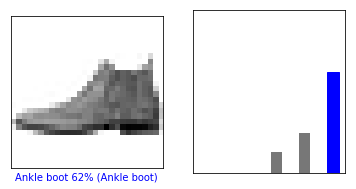

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Awesome, our model was right. We can also see a couple of other clothing types with relatively high probabilities, but the model picked the right one (in blue) so who gives a s?&#. Me so lets look at 15 at once and see how well the model did

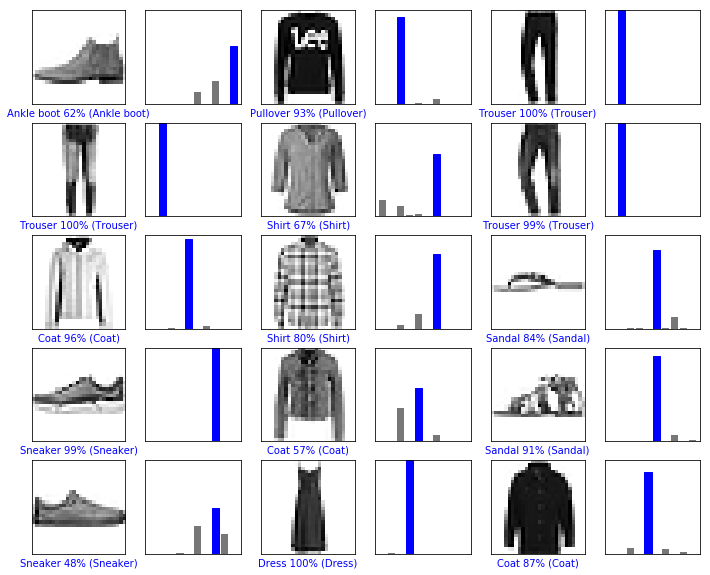

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Awesome again, it look like the model was correct for all of these as well. Some look a little less confident, i.e. the shirt in (2,4) but that's okay.

So lets make a prediction on a single image. This might be what you want to do when running a classifier in this so called "real world". The cavet here is that keras is optimized for making batch predictions so our single image has to be in a list.

In [33]:
img = test_images[0]
img = (np.expand_dims(img,0)) #this is the adding it to a list part
predictions_single = model.predict(img)

print(predictions_single)

[[2.1951543e-07 3.6537595e-09 2.0882633e-06 6.4718711e-07 2.0263010e-06
  1.3168432e-01 1.3937186e-05 2.4410748e-01 3.6137658e-03 6.2057555e-01]]


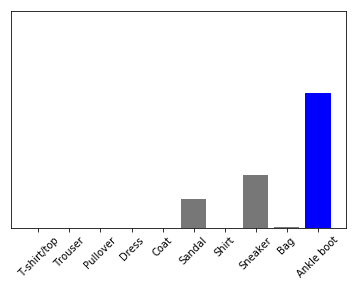

In [34]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Ankle Boot.